# Video Game Dataset

### About Data
This Dataset provides up-to-date information on the sales performance and popularity of various video games worldwide. The data includes the name, platform, year of release, genre, publisher, and sales in North America, Europe, Japan, and other regions. It also features scores and ratings from both critics and users, including average critic score, number of critics reviewed, average user score, number of users reviewed, developer, and rating. This comprehensive and essential dataset offers valuable insights into the global video game market and is a must-have tool for gamers, industry professionals, and market researchers.



- The descriptions of the columns in the dataset are as follows:
  - **Name**: The name of the video game.
  - **Platform**: The platform on which the game was released, such as PlayStation, Xbox, Nintendo, etc.
  - **Year_of_Release**: The year in which the game was released.
  - **Genre**: The genre of the video game, such as action, adventure, sports, etc.
  - **Publisher**: The company responsible for publishing the game.
  - **NA_Sales**: The sales of the game in North America.
  - **EU_Sales**: The sales of the game in Europe.
  - **JP_Sales**: The sales of the game in Japan.
  - **Other_Sales**: The sales of the game in other regions.
  - **Global_Sales**: The total sales of the game across the world.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Load the dataset
#### Import the required packages

In [ ]:
# import the libraries
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
data_path = "/content/drive/MyDrive/77765/AI and intelligent agent/final assignment/Video_Games.csv"

# read the dataset
data = pd.read_csv(data_path)

In [ ]:
# creating a copy of the data so that original data remains unchanged

df = data.copy()

### Data Preprocessing (Data Understanding)

In [ ]:
# check the first few rows of the data
df.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
10331,Aqua Aqua,PS2,2000.0,Puzzle,3DO,0.05,0.04,0.0,0.01,0.11,79.0,14.0,tbd,NaN,Zed Two Limited,E
6757,Sword Art Online: Lost Song,PS4,2015.0,Role-Playing,Namco Bandai Games,0.10,0.11,0.0,0.04,0.25,63.0,32.0,6.3,60.0,"Bandai Namco Games, Artdink",T
16712,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
355,The Simpsons: Road Rage,PS2,2001.0,Racing,Electronic Arts,2.02,1.17,0.0,0.42,3.61,64.0,23.0,7.7,32.0,Fox Interactive,T
3262,NFL Quarterback Club 99,N64,1998.0,Sports,Acclaim Entertainment,0.59,0.02,0.0,0.00,0.62,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check the data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


there is a problem with the user_score ( it should not be an object),

In [ ]:
# check for missing values
df.isnull().sum()


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

there are missing values in, year_of release, critic_score & count, user_count, Developer and rating



In [ ]:
# checking for duplicate values in the data

df.duplicated().sum()# checking for duplicate values in the data


0

In [ ]:
# display some descriptive statistics of the data
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


the data ranges from 1980 to 2020, the minimum and maxmium gobla sales is 0 and 82 million dollars respectively. the mean gb sales is 500 thousand dollars

In [ ]:
# select only the features that are object data types and observe
# for catigorical data
catigorical_df = df.select_dtypes(include = "object")

catigorical_df.describe()


,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,16717,16719,16717,16665,10015,10096,9950
unique,11562,31,12,581,96,1696,8
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,tbd,Ubisoft,E
freq,12,2161,3370,1356,2425,204,3991


#### Explore each variable to note the issue with each varaible

##### Print all the categories with their counts

In [ ]:
catigorical_df.value_counts()

Name                          Platform  Genre         Publisher          User_Score  Developer           Rating
Madden NFL 13                 PS3       Sports        Electronic Arts    5.5         EA Tiburon          E         2
Need for Speed: Most Wanted   PC        Racing        Electronic Arts    8.5         Black Box           T         2
                              X360      Racing        Electronic Arts    8.5         EA Canada           T         2
Racquet Sports                PS3       Sports        Ubisoft            4.3         Asobo Studio        E         1
RTX Red Rock                  PS2       Shooter       LucasArts          5           LucasArts           T         1
                                                                                                                  ..
Groovin' Blocks               Wii       Puzzle        Zoo Games          8.5         Empty Clip Studios  E         1
Group S Challenge             XB        Racing        Capcom         

In [ ]:
# checking the entries in the catigorical variable
for col in catigorical_df:
  print(df[col].value_counts())
  print("-"*50) # to create demacation

Need for Speed: Most Wanted                         12
FIFA 14                                              9
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: Name, Length: 11562, dtype: int64
--------------------------------------------------
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN  



*   user_score is object becuase there is text in one of it entries: "tbd". user_score should be numeric




### Data Cleaning

#### Treating Critic_Score and Critic_Count

In [ ]:
df["Critic_Score"].describe()


count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

In [ ]:
df["Critic_Count"].describe()

count    8137.000000
mean       26.360821
std        18.980495
min         3.000000
25%        12.000000
50%        21.000000
75%        36.000000
max       113.000000
Name: Critic_Count, dtype: float64


fill all rows with missing critic score and count with 0  because our data does not have 0. this well help in easy identification of where we have made changes. Additionally no row will be dropped

In [ ]:
# we can decide to fill all rows with no critic score and critic count with zero
df["Critic_Score"].fillna(0, inplace = True)
df["Critic_Count"].fillna(0, inplace = True)

#### Treating User_Score and User_count

In [ ]:
# replace text (tbd) value with NAN
df["User_Score"].replace("tbd", np.nan, inplace = True)

In [ ]:
# after replacing the tbd with nan, the missing values in User_score and User_Count now match each other
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
# convert the data type to appropriate data type
df["User_Score"] = df["User_Score"].astype("float")

In [ ]:
df["User_Score"].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: User_Score, dtype: float64

##### we can decide to fill missing values with median value becuase dropping all the rows with missing values will serious affect our analysis

In [ ]:
# we can decide to fill missing values with median value
df["User_Score"].fillna(df["User_Score"].median(), inplace = True)

In [ ]:
# check the descriptive statistics
df["User_Count"].describe()

count     7590.000000
mean       162.229908
std        561.282326
min          4.000000
25%         10.000000
50%         24.000000
75%         81.000000
max      10665.000000
Name: User_Count, dtype: float64

since there is no zero. we fill the missing user count as zero to distinguish where we have our missing values

In [ ]:
# we can fill missing values with 0
df["User_Count"].fillna(0, inplace= True)

In [ ]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6623
Rating             6769
dtype: int64

 year of release (year video game is release will not nececary predict the global sales), developer(to many)  will not be used in our model so it will not be cleaned.

#### Treating Rating
##### will contribute to global sales so we have to clean it

In [ ]:
# we can fill the NAN in Rating with "unknown"
# since rating is not a number let put it as unknown
df["Rating"].fillna("Unknown", inplace = True)

#### Treating Genre
dropping the two missing row will not affect our data

In [ ]:
# we can drop the few rows missing
df.dropna(subset = ["Genre"], inplace = True)

# reset index
df.reset_index(drop = True, inplace = True)


In [ ]:
df.isnull().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6621
Rating                0
dtype: int64

the missing genre and name are in thesame row

### Selecting the top  platforms

In [ ]:
df["Platform"].value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

The platform may contribute to global sales and  they are also very many. using on hot endcoding on so many plat form will increase the number of colums which may lead to over fitting.
so i decided to focus on platform that are very common because it will help me understand  the contribution to the global sales.


let select platform that are use 1 thousand and above times and put the reminder as others

#### - creating now platform

In [ ]:
# setting the threshold to 1000
threshold = 1000

# get the value count of platforms
plat_vc = df["Platform"].value_counts()

# filter the platforms to only those with at least 1000 occurrence
new_platform_list = plat_vc[plat_vc.values >= threshold].index.tolist()

In [ ]:
new_platform_list

['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

In [ ]:
# Create an empty list to hold the platform values
platform_vals = []

# Iterate over each row in the dataframe
for i in range(df.shape[0]):

    # Get the platform value for the current row
    txt = df.loc[i, "Platform"]

    # Initialize flag variable to 0
    flag = 0

    # Iterate over the new_platforms list
    for item in new_platform_list:

        # If the item is in the current row and flag is 0, append the item to platform_vals
        if item in txt and flag == 0:
            platform_vals.append(item)
            flag = 1

    # If the flag is 0, the row value is not in the new platforms list. Append "Others" to platform_vals
    if flag == 0:
        platform_vals.append("Others")

In [ ]:
# creating a new column from exiting colum (feature engineering)
df["New_platform"] = platform_vals

In [ ]:
# checking if the changes has been effected
df["New_platform"].value_counts()

Others    4593
DS        2672
PS2       2161
PS        2022
Wii       1467
PS3       1331
X360      1262
PSP       1209
Name: New_platform, dtype: int64

#### Data Visualization

##### Univariate Analysis of Numerical Features

##### Checking the distribution



<Figure size 768x576 with 0 Axes>

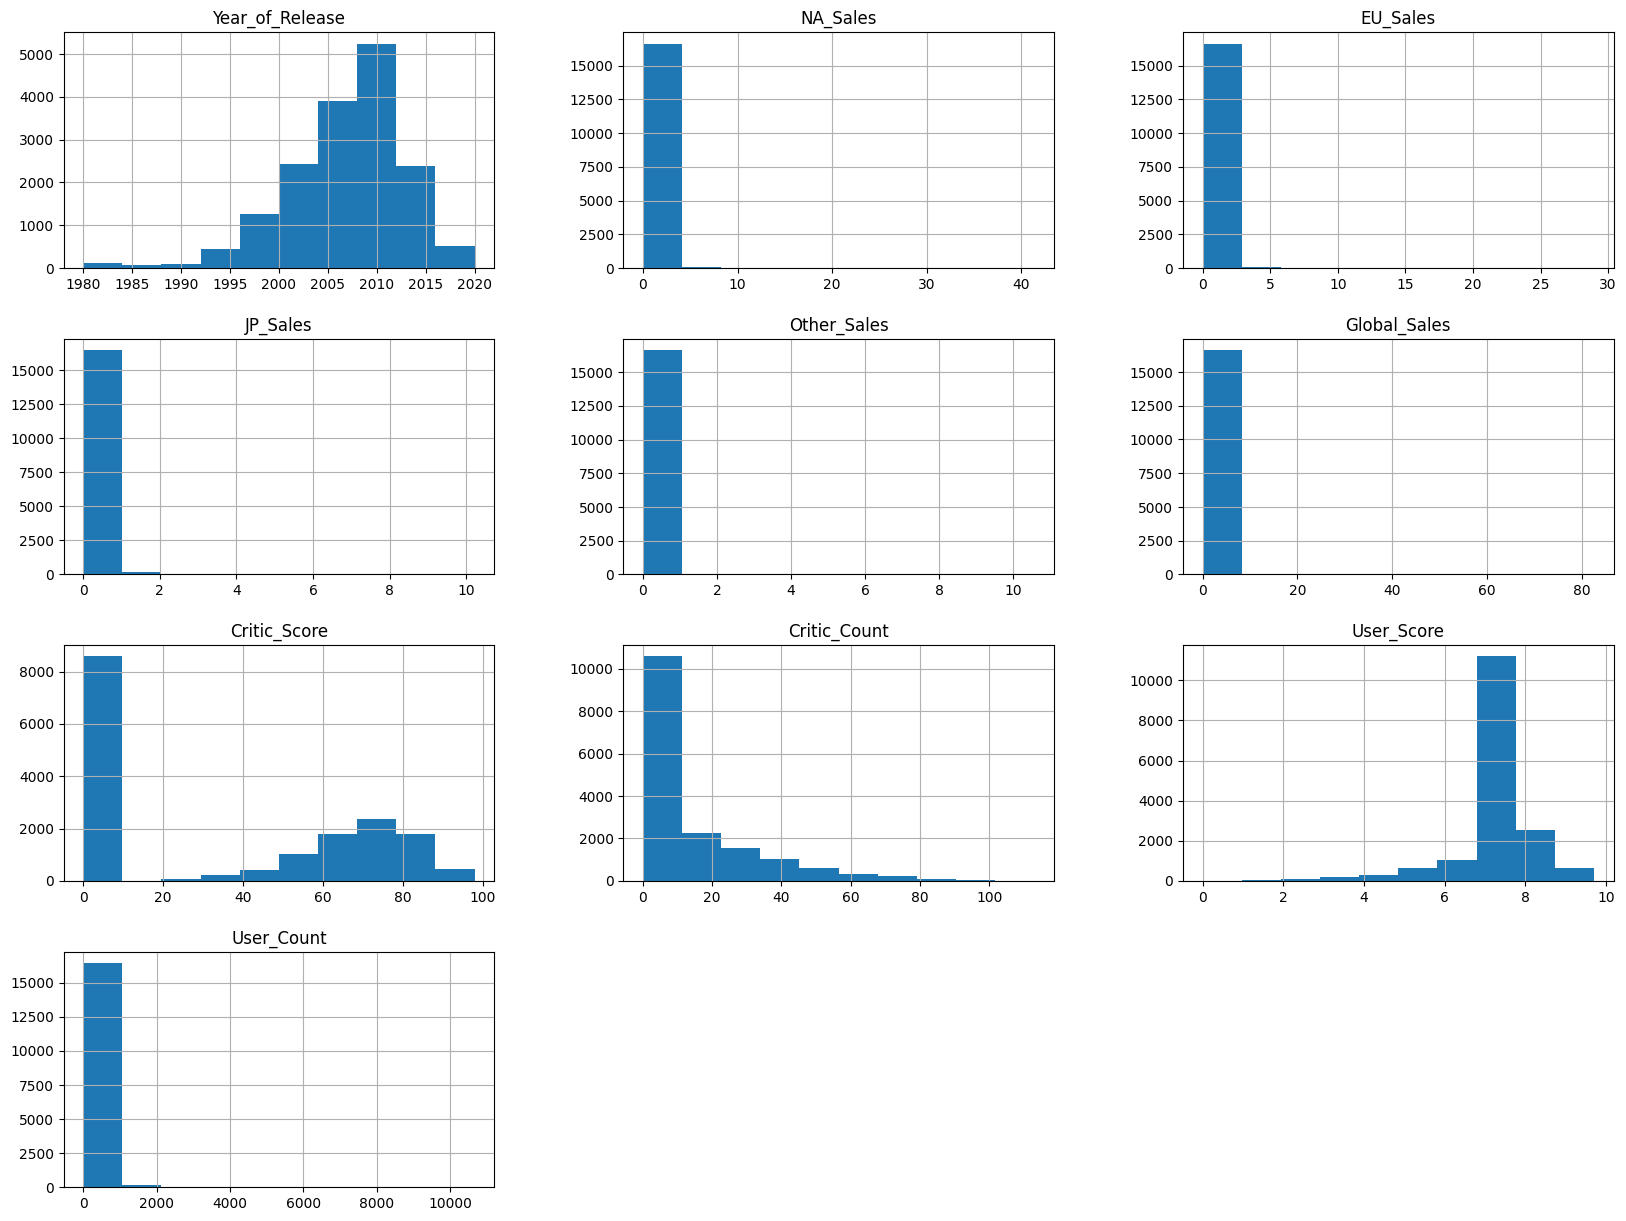

In [ ]:
# These charts display all the numerical datatypes
plt.figure(dpi=120)#
df.hist(figsize=(20,15))
plt.show()

 very little can be gotting from this plot. individual plot my provide more insight

###  Defining the function for creating histogram and boxplot

In [ ]:
# Defining the function for creating histogram and boxplot
# modified after. aileadtech.(2022) Data Visualization with Python.11 December.Available at:https://www.youtube.com/watch?v=icOcecahe5Y&list=PLqe6YDeOlcOYswRxkfWr17v25ym-ScKdL&index=16(Accessed: 26 March 2023).

def histogram_boxplot(data, feature, figsize=(7, 5), kde=False, bins=None, title=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    if title:
      ax_box2.set_title(title)
    plt.show()

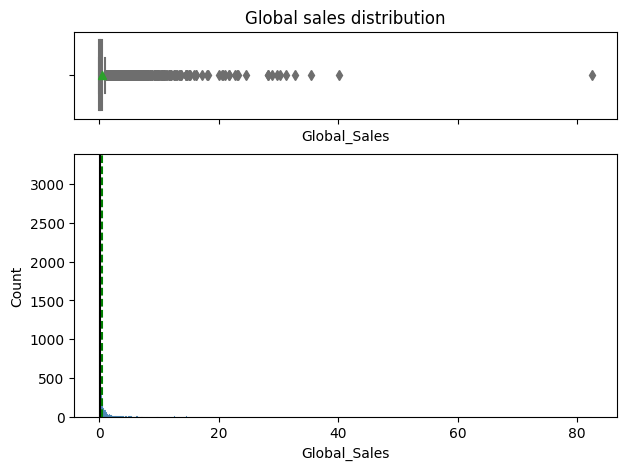

In [ ]:
# checking the distribution of the global sales
histogram_boxplot(data = df, feature="Global_Sales", title="Global sales distribution")

they are a lot of outliers

#### Univariate Analysis of  Categorical Features
-  function to create labeled barplots

In [ ]:
# function to create labeled barplots
# modified after. aileadtech.(2022) Data Visualization with Python.11 December.Available at:https://www.youtube.com/watch?v=icOcecahe5Y&list=PLqe6YDeOlcOYswRxkfWr17v25ym-ScKdL&index=16(Accessed: 26 March 2023).


def labeled_barplot(data, feature, perc=False, n=None, title = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title(title)
    plt.show()  # show the plot

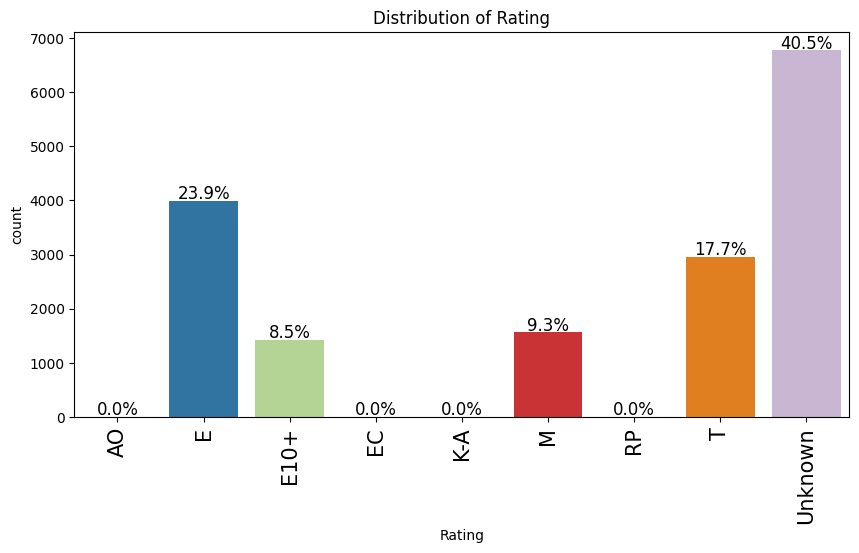

In [ ]:
labeled_barplot(data = df, feature = "Rating", perc = True, title = "Distribution of Rating")

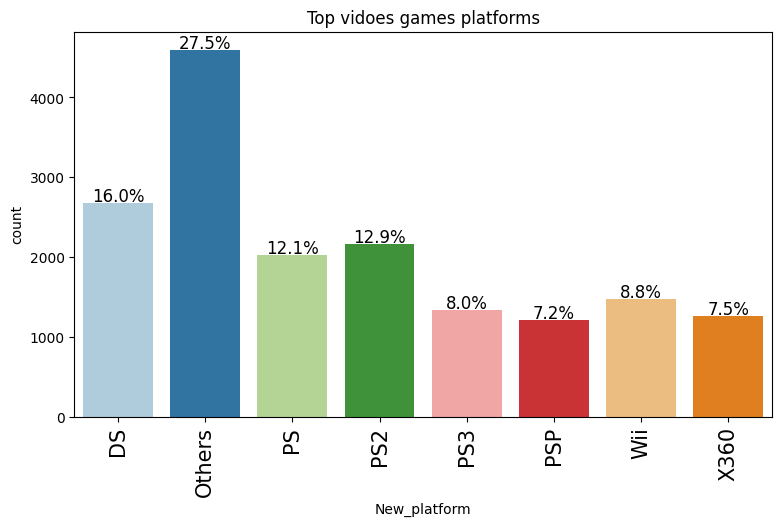

In [ ]:
# checking the new created platform
labeled_barplot(data = df, feature = "New_platform", perc = True, title ="Top vidoes games platforms")

In [ ]:
# extract the numerical features
numeric_data=df.select_dtypes(include ="number")

<Axes: >

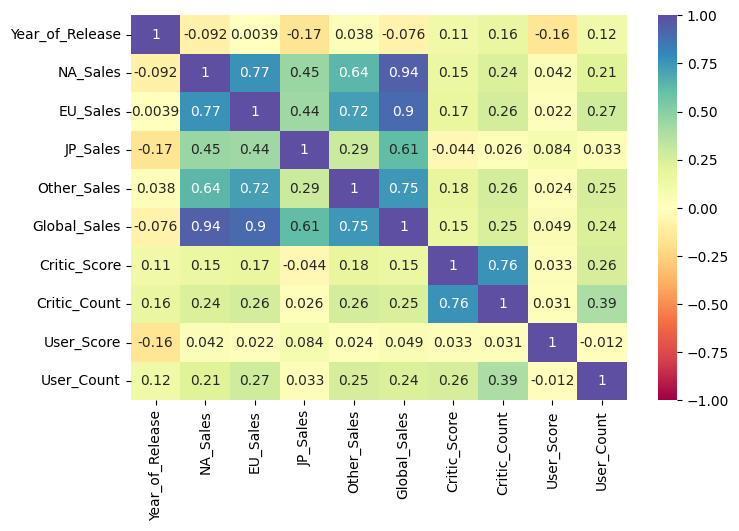

In [ ]:
# heat map
map_corr =numeric_data.corr()
plt.figure(figsize = (8,5))
sns.heatmap(map_corr,annot=True, vmin=-1, vmax =1,cmap="Spectral")
# annot  = true for the value to show. v max and min is for the legend and -1 to 1 because correlation is between -1 and 1

According to the heat map, NA_sales, EU_sales, JP_sales, and other_sales are strongly positively correlated with global sales. On the other hand, critic score and count, as well as user count, have low correlation with global sales, while user score shows little to no correlation.

However, there is a problem with collinearity, which may result in a falsely high R2 score. To address this issue, we can use the adjusted R2 to penalize the model for including unnecessary features in its prediction.

Additionally, we can observe the following correlations between features: EU_sales/NA_sales has a correlation coefficient of 0.77, EU_sales/others has a coefficient of 0.72, critic_score/critic_count has a coefficient of 0.76, and NA_sales/others has a coefficient of 0.75.

In [ ]:
# Funtion to create scatterplot between two numerical features
def scatterplot_func(x,y, title,data = df):
  plt.figure(figsize = (6,4))
  sns.scatterplot(x=x,y=y, data = df) # data is a default line so no need to pass it
  plt.title(title)
  plt.show()

### North America Sales vs Global Sales

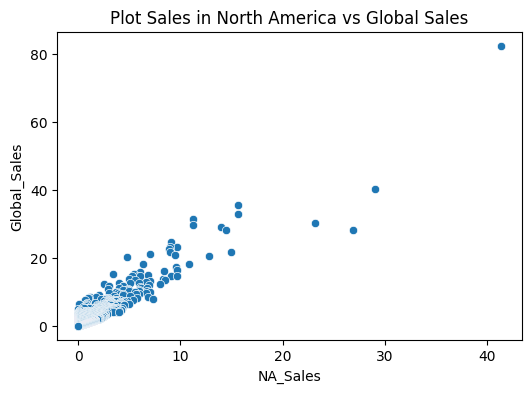

In [ ]:
scatterplot_func(x ="NA_Sales",y="Global_Sales",
                   title = "Plot Sales in North America vs Global Sales")

As the sale in north america increases global sales also increase indicating a positive relationship

### Japan Sales vs Global Sales

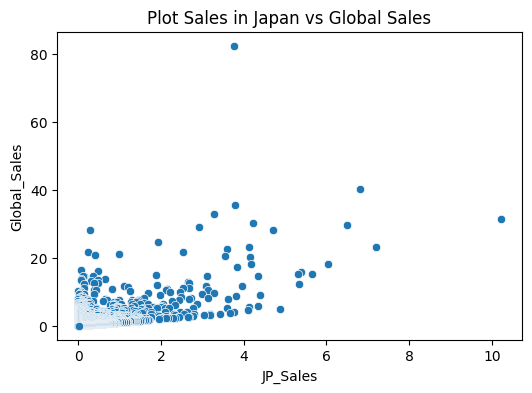

In [ ]:
scatterplot_func(x ="JP_Sales",y="Global_Sales",
                   title = "Plot Sales in Japan vs Global Sales")

From the scattar plot, there is little to no relation between sales in japan and global sales even though the correlation values was 0.66. this may be due ot the problem of collinearity

### Other Region Sales vs Global Sales

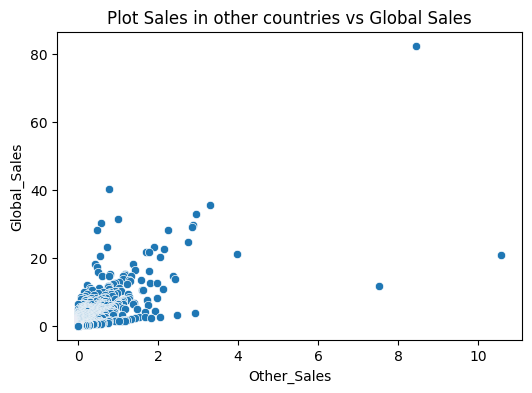

In [ ]:
scatterplot_func(x ="Other_Sales",y="Global_Sales",
                   title = "Plot Sales in other countries vs Global Sales")

There is positive relationship to global sales but not very strong

### User_score vs Global Sales

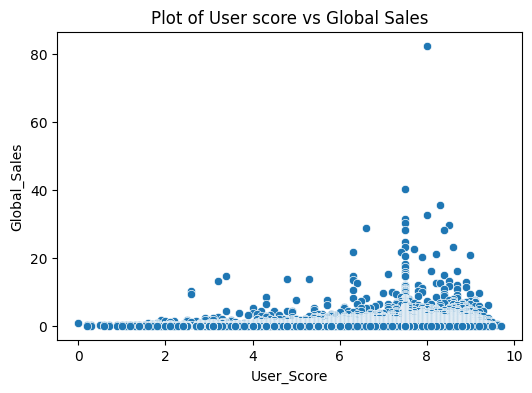

In [ ]:
scatterplot_func(x ="User_Score",y="Global_Sales",
                   title = "Plot of User score vs Global Sales")

There is no relationship

### User Count vs Global Sales

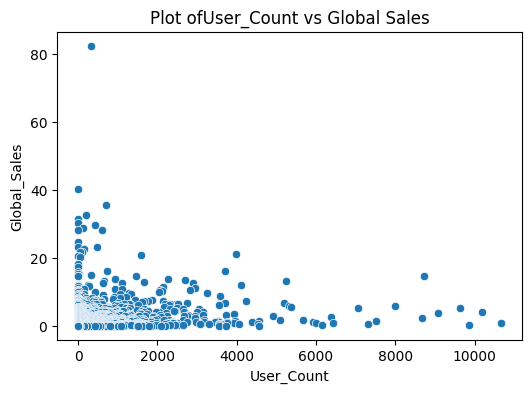

In [ ]:
scatterplot_func(x = "User_Count",y="Global_Sales",
                   title = "Plot ofUser_Count vs Global Sales")

no relationship

### Critic Score vs Global Sales

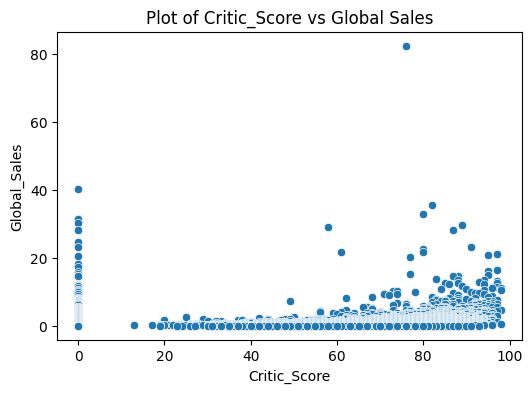

In [ ]:
scatterplot_func(x ="Critic_Score",y="Global_Sales",
                   title = "Plot of Critic_Score vs Global Sales")

No relationship

#### Critic Count vs Global Sales

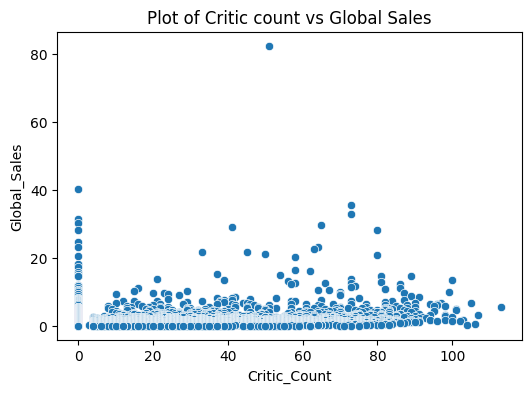

In [ ]:
scatterplot_func(x ="Critic_Count",y="Global_Sales",
                   title = "Plot of Critic count vs Global Sales")

little to no relationship between the two

While the heat map indicates a high correlation between certain features and global sales, scatter  plots reveal that some of them exhibit a weak relationship. This may be attributed to collinearity issues, which can affect the accuracy of the correlation coefficient.

### Rating vs Global Sales

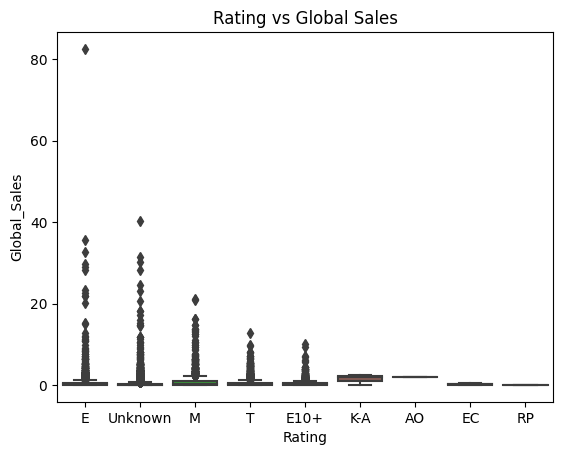

In [ ]:
sns.boxplot(x ="Rating", y= "Global_Sales", data = df);
plt.title("Rating vs Global Sales");

vidoes games with E ecellent rating tends to have more sales

### New_platform vs global sales

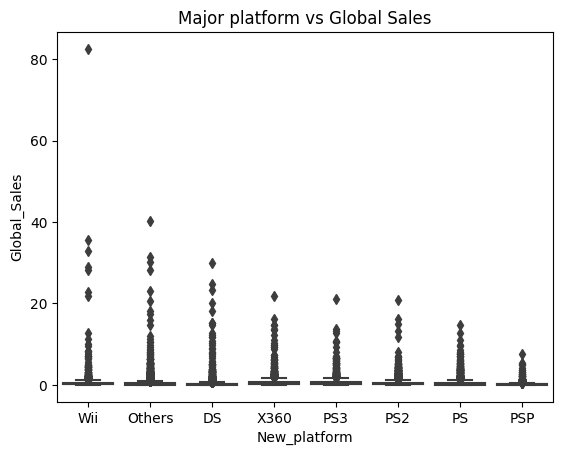

In [ ]:
sns.boxplot(x ="New_platform", y= "Global_Sales", data = df);
plt.title("Major platform vs Global Sales");

wii, other, DS have more contribution to global sales, x360,ps3 and ps2 are practically thesame

### Outlier  Detection and handling
When outliers are present in the data, the  model may be skewed towards these outliers, leading to inaccurate and unreliable predictions.

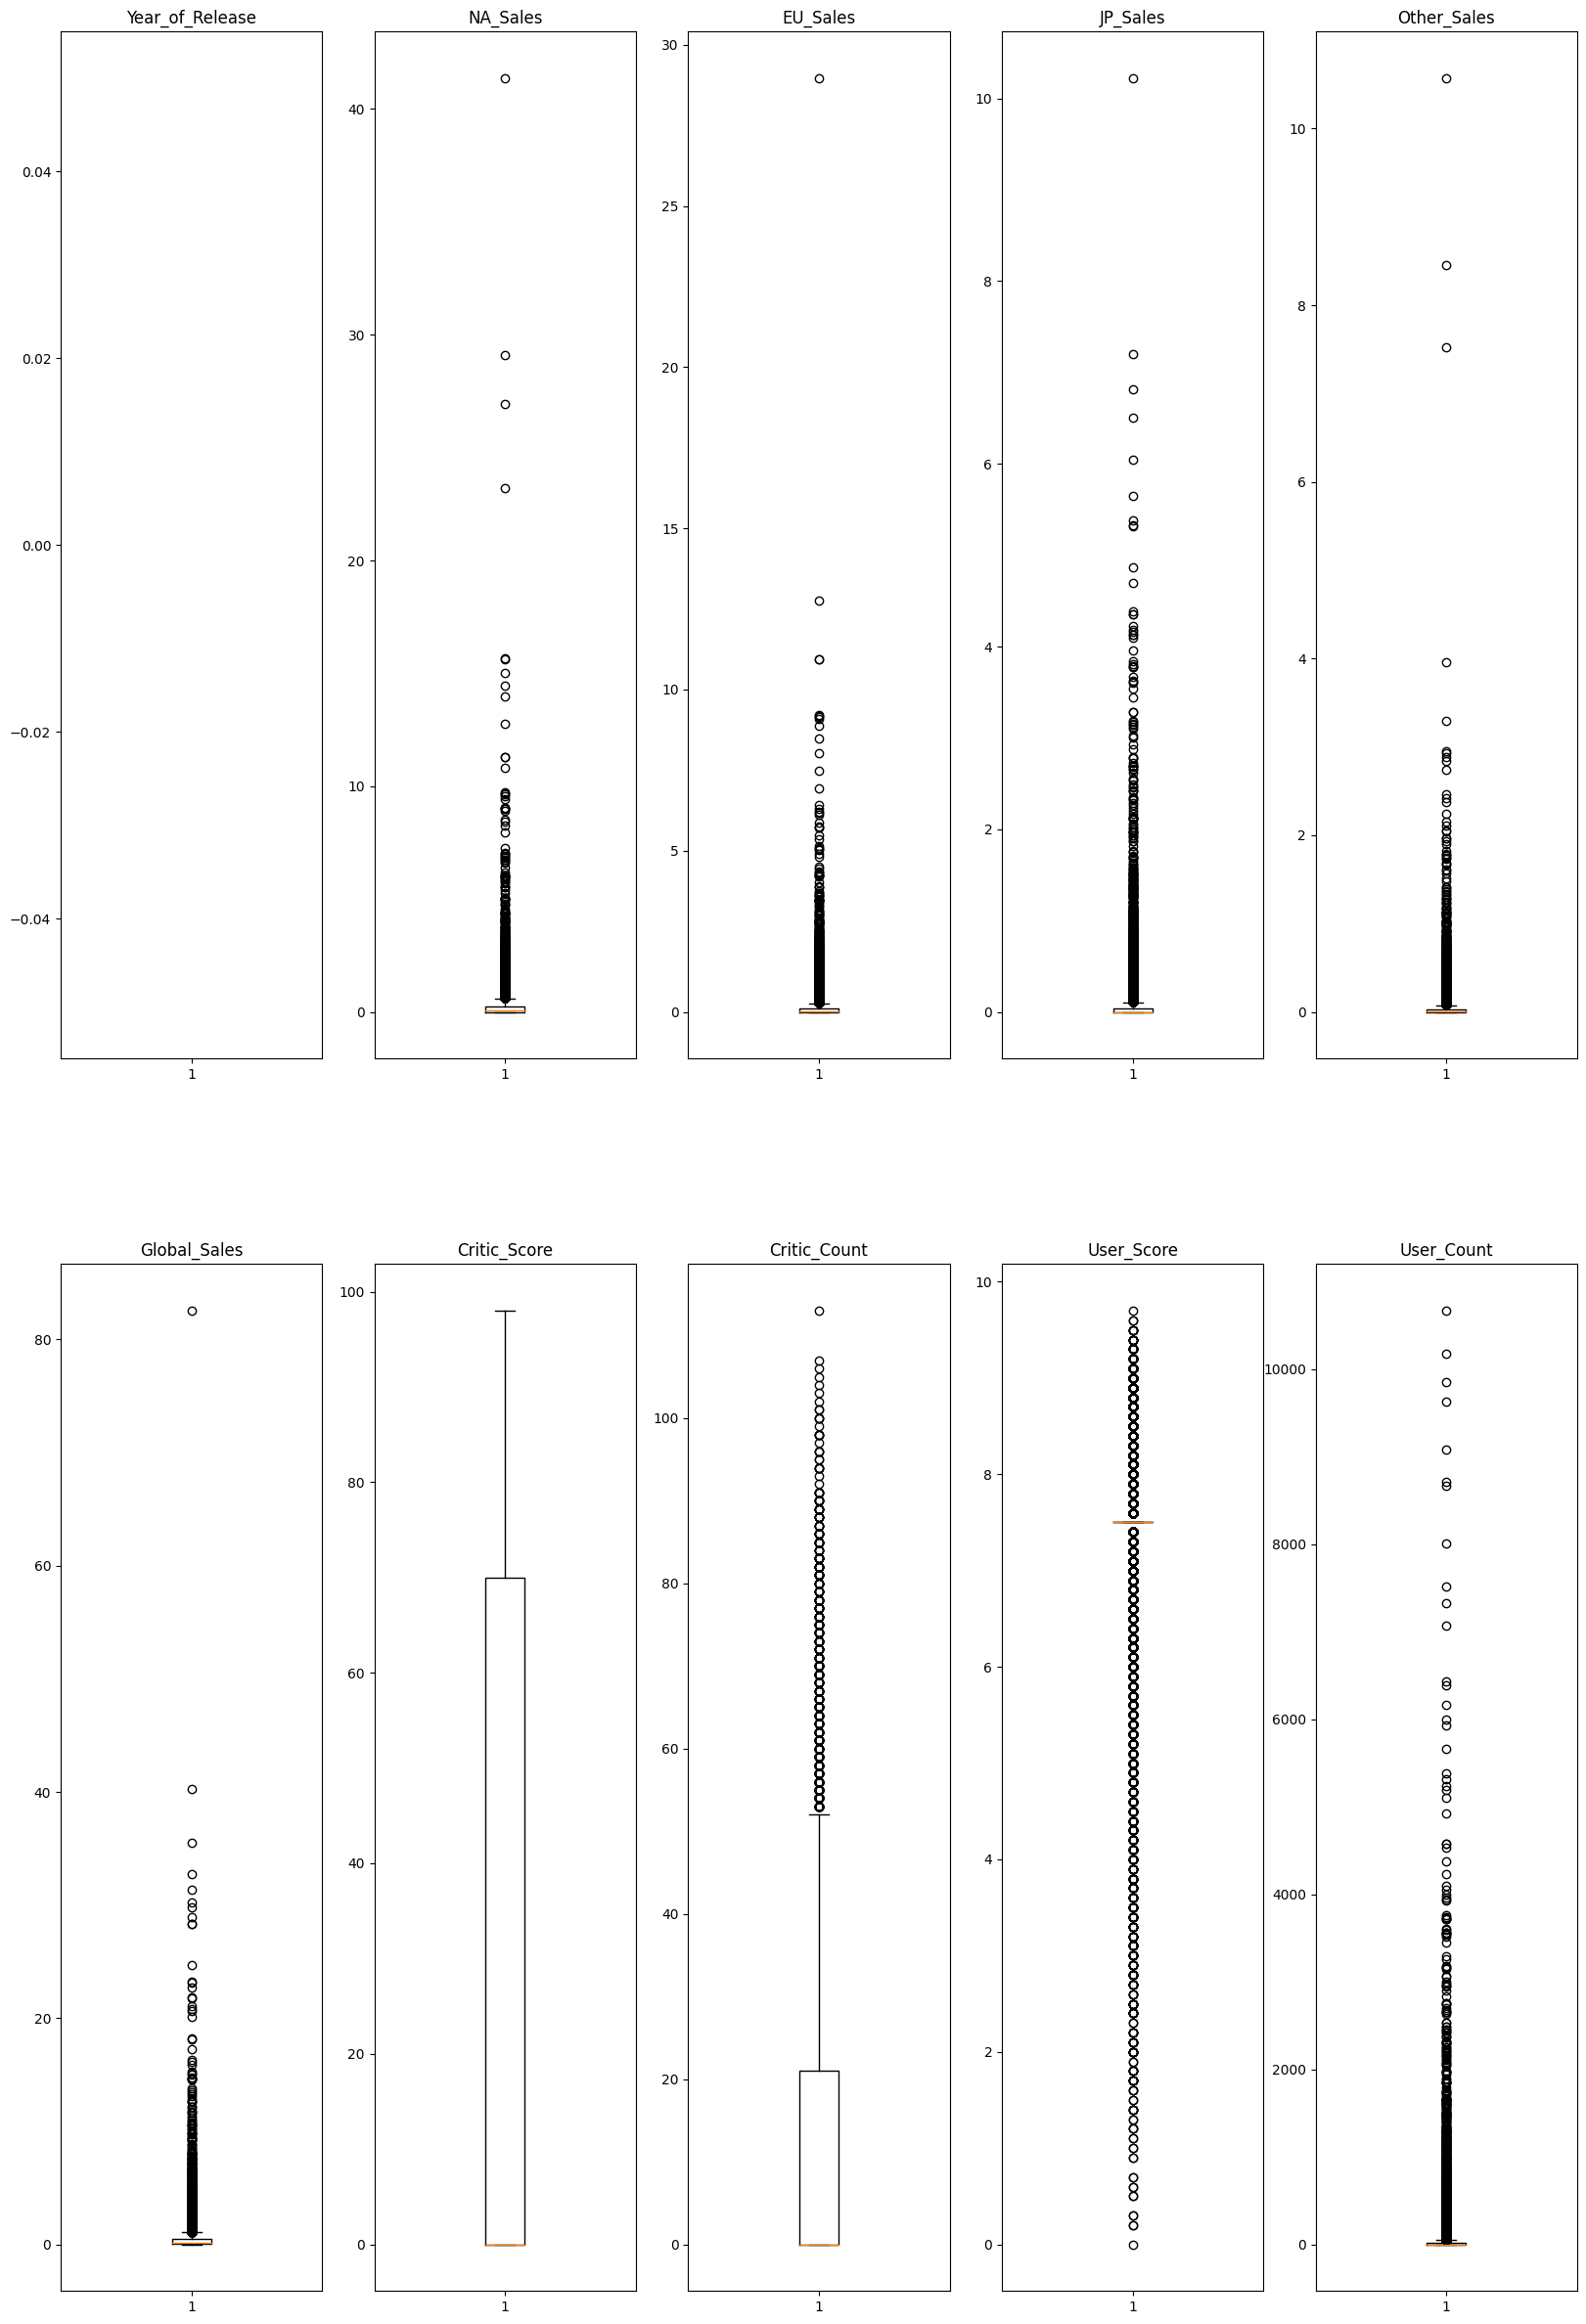

In [ ]:
# outlier detection  using boxplot
# Create a new figure with a size of 20 by 30 inches
plt.figure(figsize=(20, 30))

# Loop through each numerical variable in the dataset
for i, variable in enumerate(numeric_data):

    # Create a subplot in the figure with 2 rows and 5 columns, and set the current plot to the i-th one
    plt.subplot(2, 5, i+1)

    # Create a boxplot of the current variable
    plt.boxplot(df[variable])

    # Set the title of the current subplot to the name of the current variable
    plt.title(variable)

# Display the figure
plt.show()


# The first line of code plt.subplot(2,5, i+1) is creating a grid of 10 subplots arranged in a 2x5 grid, with the subplot index increasing by 1 for each iteration of the for loop
#The second line of code plt.boxplot(df[variable]) is creating a boxplot of the numerical data in the variable variable from the DataFrame df

- There above figure showed that there are alot of outliers in our data

###  Outlier treatment

In [ ]:
# dropping Global sales
numeric_data.drop("Global_Sales", axis = 1,  inplace = True)

numeric_data.columns

Index(['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'],
      dtype='object')

In [ ]:
# This function treats outliers in a single numerical column of a dataframe
# modified after. aileadtech.(2023) Regression.25 April.Available at:https://www.youtube.com/watch?v=icOcecahe5Y&list=PLqe6YDeOlcOYswRxkfWr17v25ym-ScKdL&index=16(Accessed: 26 April 2023)
def outliers_treatment(df, col):
    """
    Treat outliers in a numerical column of a dataframe using the interquartile range (IQR) method.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the column to be treated.
    col (str): The name of the column to be treated.

    Returns:
    pandas.DataFrame: The modified dataframe with clipped values for the specified column.
    """
    # Calculate the 25th and 75th quantiles of the column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower and upper whiskers for outlier detection
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whiskers = Q3 + (1.5 * IQR)

    # Clip the values in the column to be within the lower and upper whiskers
    df[col] = np.clip(df[col], lower_whisker, upper_whiskers)

    return df


# This function treats outliers in all numerical columns of a dataframe
def all_outliers_treatment(df, col_list):
    """
    Treat outliers in all numerical columns of a dataframe using the interquartile range (IQR) method.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the columns to be treated.
    col_list (list of str): The list of column names to be treated.

    Returns:
    pandas.DataFrame: The modified dataframe with clipped values for all specified columns.
    """
    # Loop through the columns in the col_list and call the outliers_treatment function on each column
    for c in col_list:
        df = outliers_treatment(df, c)

    # Return the modified dataframe
    return df


In [ ]:
# call the fuction to treat all the outliers
df = all_outliers_treatment(df,numeric_data)

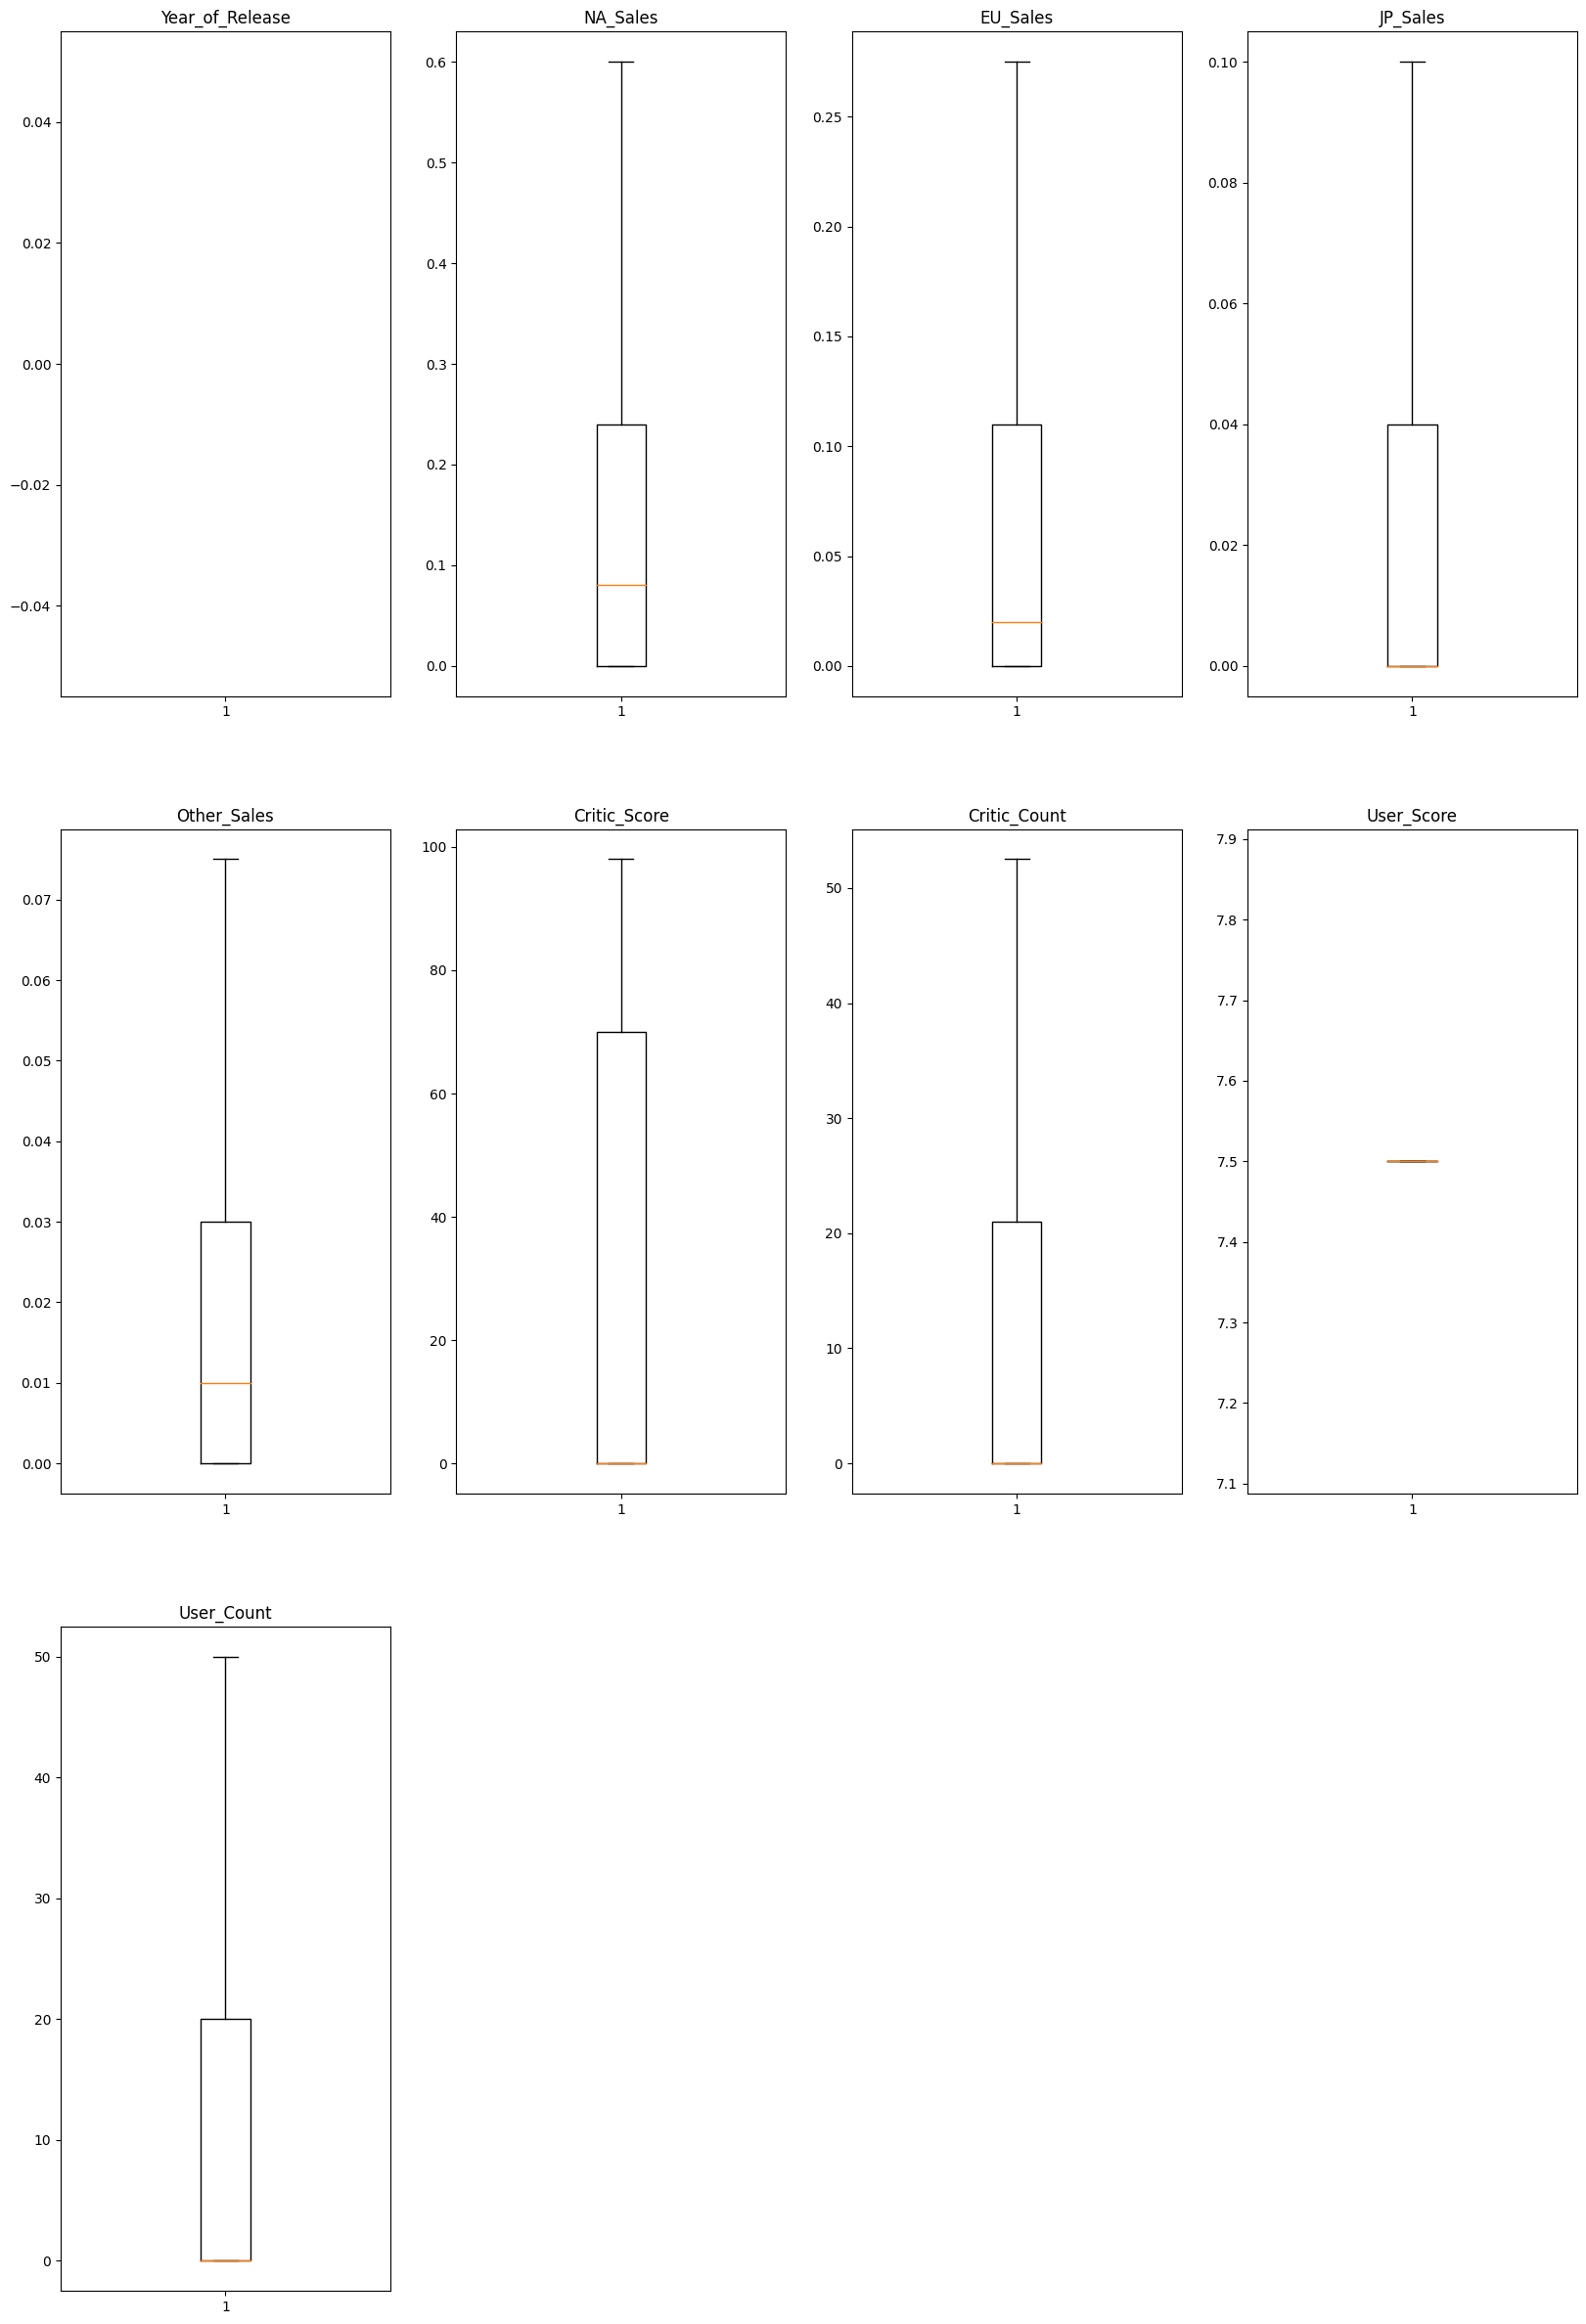

In [ ]:
# Create a figure with a size of 20 by 30 inches
plt.figure(figsize=(20, 30))

# Loop through each numerical variable in the dataset
for i, variable in enumerate(numeric_data):

    # Create a subplot in the figure with 3 rows and 4 columns, and set the current plot to the i-th one
    plt.subplot(3, 4, i+1)

    # Create a boxplot of the current variable, with whiskers set to 1.5 times the interquartile range (IQR)
    plt.boxplot(df[variable], whis=1.5)

    # Set the title of the current subplot to the name of the current variable
    plt.title(variable)

# Show the figure
plt.show()


### Treating Global_Sales

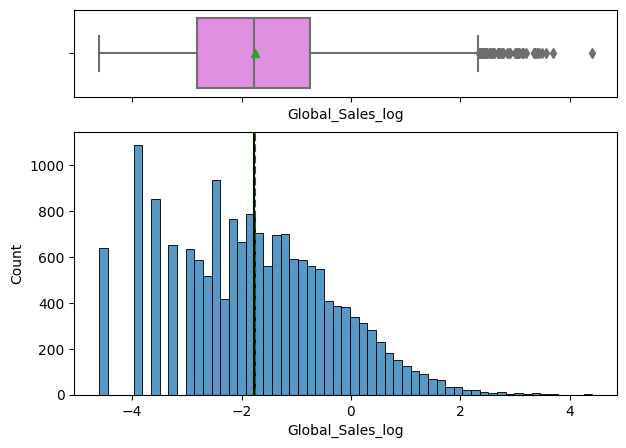

In [ ]:
# transfrom the target using log transformation. it make left or write skewwed vairable  approximatly normal
df["Global_Sales_log"] = np.log(df["Global_Sales"])

histogram_boxplot(data = df, feature="Global_Sales_log")

#histogram_boxplot(data = df, feature="Global_Sales")

### the treatment of the outlier and the transformation of taget variable global sales to log is to satisfy the 3 assumptions of linear regression


1.   Linearity: The relationship between the independent variables (predictors) and the dependent variable (response) is linear. This means that the change in the response variable is proportional to the change in the predictors.

2.   Normality: The residuals (the difference between the predicted and actual values) are normally distributed. This means that the majority of residuals should be close to zero, and the rest should be evenly distributed on both sides of zero.

3.   Independence: The residuals are independent of each other. This means that there should be no relationship or correlation between the residuals. In other words, the value of one residual should not depend on the value of another residual.


These assumptions are important because violating them can lead to inaccurate or biased results in linear regression analysis. Therefore, it is important to check for these assumptions before interpreting the results of a linear regression model.

#### Model Building
-Choose a model for the training and testing purposes

In [ ]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

### selecting all numerical feature to predict sales

In [ ]:
# Select features and target
X = df[[ "NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales", "Critic_Score", "Critic_Count",
        "User_Score", "User_Count"]]

#y = df["Global_Sales"]
y = df["Global_Sales_log"] + 1e-10

In [ ]:
# split the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [ ]:
x_train.shape

(13373, 8)

In [ ]:
x_test.shape

(3344, 8)

In [ ]:
# Normalize the data
scaler = StandardScaler() # convert data to have a mean of zero and  SDT 1


x_train_sd = scaler.fit_transform(x_train) # fit calculate the mean & SDT of each of the variable. transform use cal mean and STD to transform our data
x_test_sd = scaler.transform(x_test)


### Simple linear regression
- using the column with correlation with global sales greater than 0.4
- NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales

In [ ]:
#converting to pandas dataframe # becuase machine learning only accept 2d feature
x_train_sd = pd.DataFrame(x_train_sd, columns=x_train.columns)
x_test_sd = pd.DataFrame(x_test_sd, columns=x_test.columns)

### Reshaping the attributes  

In [ ]:
# NA_Sales
x_train_sd_NA = x_train_sd['NA_Sales'].to_numpy().reshape(-1,1)
x_test_sd_NA = x_test_sd['NA_Sales'].to_numpy().reshape(-1,1)

# EU_Sales
x_train_sd_EU = x_train_sd['EU_Sales'].to_numpy().reshape(-1,1)
x_test_sd_EU = x_test_sd['EU_Sales'].to_numpy().reshape(-1,1)

# JP_Sales
x_train_sd_JP = x_train_sd['JP_Sales'].to_numpy().reshape(-1,1)
x_test_sd_JP = x_test_sd['JP_Sales'].to_numpy().reshape(-1,1)

# other_sales
x_train_sd_others = x_train_sd['Other_Sales'].to_numpy().reshape(-1,1)
x_test_sd_others = x_test_sd['Other_Sales'].to_numpy().reshape(-1,1)

#### Model Performance Check

- We will be using metric functions defined in sklearn for RMSE, MAE,MSE and R2.

- We will define functions to calculate adjusted R2.

- The adjuted R2 penalizes the regression model for adding unimportant features.
- We will create a function that will print out all the above metrics in one go

In [ ]:
# function to compute adjusted R-squared
# modified after. aileadtech.(2022) Data Visualization with Python.11 December.Available at:https://www.youtube.com/watch?v=icOcecahe5Y&list=PLqe6YDeOlcOYswRxkfWr17v25ym-ScKdL&index=16(Accessed: 26 March 2023)
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE mean absolute percentage error
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE
    mse= mean_squared_error(target, pred) # to compute MSE
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "MSE":mse,
            "RMSE": rmse,
            "MAE": mae,
            "R2": r2,
            "Adj. R2": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

### Training and evaluation the model

In [ ]:
# train
lin_reg_NA = LinearRegression()
lin_reg_NA.fit(x_train_sd_NA, y_train)
#evaluate
lin_reg_test_NA = model_performance_regression(lin_reg_NA, x_test_sd_NA,y_test)
print("Model performance of NA_sales (correlation to golbal sale =0.94)")
print(lin_reg_test_NA)
print()

#train model
lin_reg_EU = LinearRegression()
lin_reg_EU.fit(x_train_sd_EU, y_train)

#evaluate model
lin_reg_test_EU = model_performance_regression(lin_reg_EU, x_test_sd_EU,y_test)
print("Model performance of EU_sales (correlation to golbal sale =0.9)")
print(lin_reg_test_EU)
print()

#train model JP_sales
lin_reg_JP = LinearRegression()
lin_reg_JP.fit(x_train_sd_JP, y_train)

#evaluate model
lin_reg_test_JP = model_performance_regression(lin_reg_JP, x_test_sd_JP,y_test)
print("Model performance of JP_sales (correlation to golbal sale =0.61)")
print(lin_reg_test_JP)
print()

#train model JP_sales
lin_reg_others = LinearRegression()
lin_reg_others.fit(x_train_sd_others, y_train)

#evaluate model
lin_reg_test_others = model_performance_regression(lin_reg_others, x_test_sd_others,y_test)
print("Model performance of others_sales (correlation to golbal sale =0.75)")
print(lin_reg_test_others)
print()


Model performance of NA_sales (correlation to golbal sale =0.94)
        MSE      RMSE       MAE        R2  Adj. R2          MAPE
0  0.727802  0.853113  0.641517  0.658432  0.65833  4.858293e+08

Model performance of EU_sales (correlation to golbal sale =0.9)
        MSE      RMSE       MAE       R2   Adj. R2          MAPE
0  0.966538  0.983127  0.760014  0.54639  0.546254  2.869063e+08

Model performance of JP_sales (correlation to golbal sale =0.61)
        MSE      RMSE       MAE        R2   Adj. R2          MAPE
0  1.981565  1.407681  1.154542  0.070023  0.069745  8.856782e+08

Model performance of others_sales (correlation to golbal sale =0.75)
        MSE      RMSE       MAE        R2   Adj. R2          MAPE
0  0.814165  0.902311  0.695988  0.617901  0.617786  1.983194e+08



### Multiple linear regression

In [ ]:
# Build the linear regression model
mlin_reg = LinearRegression()

# build model
mlin_reg.fit(x_train_sd,y_train)

LinearRegression()

###### Interpreting Model Performance

In [ ]:
#trianing data set
lin_reg_training_num = model_performance_regression(mlin_reg,x_train_sd,y_train)
lin_reg_training_num
print("Model performance of the numerical data on the training data")
print(lin_reg_training_num )
print()

# testing data set
lin_reg_testing_num = model_performance_regression(mlin_reg,x_test_sd,y_test)
lin_reg_testing_num
print("Model performance of the numerical data on the testing data")
print(lin_reg_testing_num)

Model performance of the numerical data on the training data
        MSE      RMSE       MAE        R2  Adj. R2          MAPE
0  0.421617  0.649321  0.514507  0.803648  0.80353  8.901474e+08

Model performance of the numerical data on the testing data
        MSE      RMSE       MAE        R2   Adj. R2          MAPE
0  0.418727  0.647091  0.517477  0.803485  0.803014  3.359908e+08


- model performed better on multiple linear regression
-the model is not overfitting because the performance of the traing is similar to the testing


### Determing the optimum aplha value  for ridge regressors

In [ ]:
#  import the ridge algorithm
from sklearn.linear_model import Ridge

In [ ]:
# instantiate the model
ridge = Ridge(random_state=0)
#ridge = Ridge(random_state=0, alpha = 1.5)
# fit the model
ridge.fit(x_train_sd,y_train)

#   observe the coefficients of the linear regression

Ridge(random_state=0)

In [ ]:
# check performance of ridge regression on trian data
ridge_train = model_performance_regression(ridge, x_train_sd,y_train)
ridge_train

,MSE,RMSE,MAE,R2,Adj. R2,MAPE
0,0.421617,0.649321,0.514502,0.803648,0.80353,8.900502e+08


In [ ]:
# check performance of ridge regression on testing data
ridge_test = model_performance_regression(ridge, x_test_sd,y_test)
ridge_test

,MSE,RMSE,MAE,R2,Adj. R2,MAPE
0,0.418729,0.647093,0.517473,0.803484,0.803013,3.359346e+08


In [ ]:
# writing a loop to check different value of alpha on the perfomance of the model

alpha_values = np.linspace(0.2, 10, num = 10)
for alpha in alpha_values:
  ridge = Ridge(random_state=0, alpha=alpha)
  ridge.fit(x_train_sd,y_train)
  ridge_train = model_performance_regression(ridge, x_train_sd,y_train)
  print(ridge_train)
  print(alpha)

        MSE      RMSE       MAE        R2  Adj. R2          MAPE
0  0.421617  0.649321  0.514506  0.803648  0.80353  8.901280e+08
0.2
        MSE      RMSE     MAE        R2  Adj. R2          MAPE
0  0.421617  0.649321  0.5145  0.803648  0.80353  8.900222e+08
1.288888888888889
        MSE      RMSE       MAE        R2  Adj. R2          MAPE
0  0.421617  0.649321  0.514495  0.803648  0.80353  8.899164e+08
2.377777777777778
        MSE      RMSE      MAE        R2  Adj. R2          MAPE
0  0.421617  0.649321  0.51449  0.803648  0.80353  8.898107e+08
3.4666666666666672
        MSE      RMSE       MAE        R2  Adj. R2          MAPE
0  0.421617  0.649321  0.514485  0.803648  0.80353  8.897050e+08
4.555555555555556
        MSE      RMSE       MAE        R2  Adj. R2          MAPE
0  0.421618  0.649321  0.514479  0.803648  0.80353  8.895993e+08
5.644444444444445
        MSE      RMSE       MAE        R2  Adj. R2          MAPE
0  0.421618  0.649321  0.514474  0.803648  0.80353  8.894937e+08
6

changing the alpha did not improve the perfarmce of our model

### Determing the alpha for lasso regression

In [ ]:

# instantiate the model without setting the alpha value
lasso = Lasso(random_state=0)
# fit the model
lasso.fit(x_train_sd,y_train)

Lasso(random_state=0)

In [ ]:
# check performance of ridge regression on trian data
lasso_train = model_performance_regression(lasso, x_train_sd,y_train)
lasso_train

,MSE,RMSE,MAE,R2,Adj. R2,MAPE
0,1.725439,1.31356,1.066118,0.196442,0.195961,1.938812e+09


In [ ]:
# check performance of ridge regression on trian data
lasso_test = model_performance_regression(lasso, x_test_sd,y_test)
lasso_test

,MSE,RMSE,MAE,R2,Adj. R2,MAPE
0,1.710238,1.307761,1.048251,0.197361,0.195436,8.883424e+08


In [ ]:
# changing the alpha value for lasso
alpha_values = np.linspace(0.001, 0.2, num = 10)# start 0.2, stop 10, number of loops = 10
for alpha in alpha_values:
  lasso = Lasso(random_state=0, alpha=alpha)
  lasso.fit(x_train_sd,y_train)
  lasso_train = model_performance_regression(lasso, x_train_sd,y_train)
  print(lasso_train)
  print(alpha)

        MSE      RMSE       MAE        R2   Adj. R2          MAPE
0  0.421631  0.649331  0.514424  0.803641  0.803524  8.872091e+08
0.001
        MSE      RMSE       MAE        R2   Adj. R2          MAPE
0  0.427989  0.654208  0.515207  0.800681  0.800561  8.220325e+08
0.023111111111111114
        MSE      RMSE       MAE        R2   Adj. R2          MAPE
0  0.432311  0.657503  0.513689  0.798668  0.798547  8.096296e+08
0.045222222222222226
        MSE      RMSE       MAE        R2   Adj. R2          MAPE
0  0.438955  0.662537  0.513857  0.795573  0.795451  7.960010e+08
0.06733333333333334
        MSE      RMSE       MAE        R2   Adj. R2          MAPE
0  0.446463  0.668179  0.514276  0.792077  0.791952  7.746786e+08
0.08944444444444445
        MSE      RMSE      MAE        R2   Adj. R2          MAPE
0  0.456089  0.675344  0.51585  0.787594  0.787467  7.533563e+08
0.11155555555555556
        MSE      RMSE       MAE        R2   Adj. R2          MAPE
0  0.467833  0.683983  0.518612  0.7

optimum alpha value for lasso is 0.0001

### Determining the best regressor

In [ ]:
# instantiate all the regessor and fitting the model

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train_sd, y_train)

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(x_train_sd, y_train)

# Build the linear regression model
mlin_reg = LinearRegression()

# build model
mlin_reg.fit(x_train_sd,y_train)

lasso = Lasso(random_state=0, alpha=0.001)
lasso.fit(x_train_sd,y_train)

# Support Vector Regression
svr = SVR(kernel='linear')
svr.fit(x_train_sd, y_train)

# Ridge
n_ridge = Ridge(random_state=0)
n_ridge.fit(x_train_sd,y_train)

# K Neighbors Regression
kn = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn.fit(x_train_sd, y_train)


KNeighborsRegressor(weights='distance')

In [ ]:
# testing the performance of all the regressors
lasso_test = model_performance_regression(lasso, x_test_sd,y_test)
print("Model performance of lasso regression")
print(lasso_test)
print()

# check performance of ridge regression on testing data
ridge_test = model_performance_regression(n_ridge, x_test_sd,y_test)
print("Model performance of ridge regression")
print(ridge_test)
print()


gradient_test = model_performance_regression(gb, x_test_sd,y_test)
print("Model performance of Gradient Boosting regression")
print(gradient_test)
print()

random_test = model_performance_regression(rf, x_test_sd,y_test)
print("Model performance of RandomForest regression")
print(random_test)
print()

support_test = model_performance_regression(svr, x_test_sd,y_test)
print("Model performance of support vector regression")
print(support_test)
print()


linear_test = model_performance_regression(mlin_reg, x_test_sd,y_test)
print("Model performance of Linear regression")
print(linear_test)
print()


linear_test = model_performance_regression(kn, x_test_sd,y_test)
print("Model performance of KNeighborsRegressor")
print(linear_test)
print()

Model performance of lasso regression
        MSE      RMSE       MAE        R2   Adj. R2          MAPE
0  0.418786  0.647136  0.517342  0.803458  0.802987  3.338751e+08

Model performance of ridge regression
        MSE      RMSE       MAE        R2   Adj. R2          MAPE
0  0.418729  0.647093  0.517473  0.803484  0.803013  3.359346e+08

Model performance of Gradient Boosting regression
        MSE      RMSE       MAE       R2   Adj. R2          MAPE
0  0.087831  0.296362  0.164699  0.95878  0.958681  2.272803e+07

Model performance of RandomForest regression
        MSE      RMSE       MAE        R2   Adj. R2          MAPE
0  0.086145  0.293505  0.147731  0.959571  0.959474  4.609006e+07

Model performance of support vector regression
        MSE      RMSE       MAE        R2   Adj. R2          MAPE
0  0.438997  0.662569  0.502283  0.793972  0.793478  2.747299e+08

Model performance of Linear regression
        MSE      RMSE       MAE        R2   Adj. R2          MAPE
0  0.418727  0

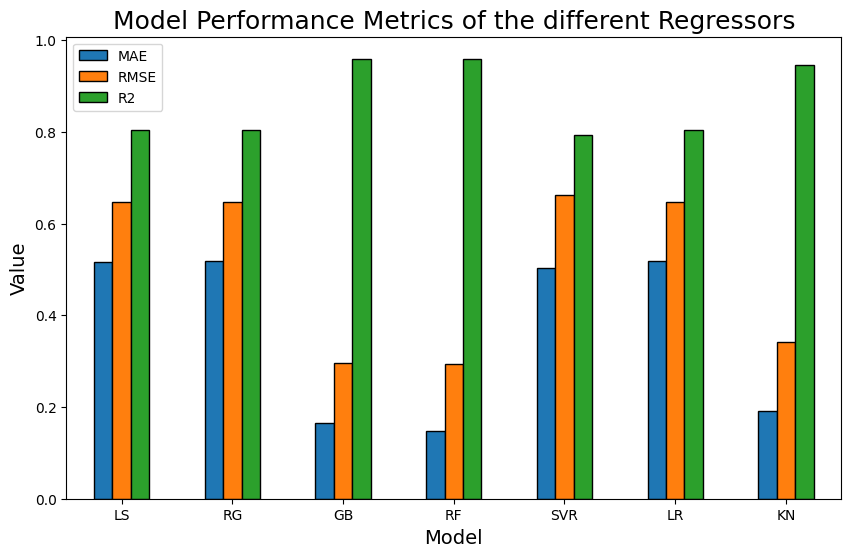

In [ ]:
# visualizing the different regressors

# Create a dataframe with the model performance metrics
data = {'Model': ['LS', 'RG', 'GB', 'RF', 'SVR', 'LR','KN'],
        'MAE': [0.517342, 0.517477, 0.164699, 0.147731, 0.502283, 0.517477, 0.191973],
        'RMSE': [0.647136, 0.647091, 0.296362, 0.293505, 0.662569, 0.647091,0.340729],
        'R2': [0.803458, 0.803485, 0.95878, 0.959571, 0.793972, 0.803485,0.945514]}
df_v = pd.DataFrame(data)

# Set the Model column as the index
df_v.set_index('Model', inplace=True)

# Plot the bar chart
ax = df_v.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'], edgecolor='black')

# Set the plot title and labels
ax.set_title('Model Performance Metrics of the different Regressors', fontsize=18)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Value', fontsize=14)
ax.set_xticklabels(df_v.index, rotation=0)

# Show the plot
plt.show()


### Evaluating the model performance on training and test data of the the top two regressor

In [ ]:
# random forest training
random_train = model_performance_regression(rf, x_train_sd,y_train)
print("Model performance of RandomForest regression on train data")
print(random_train)
print()
# random forest train
random_test = model_performance_regression(rf, x_test_sd,y_test)
print("Model performance of RandomForest regression on test data")
print(random_test)
print()
print()

# gradian_bosting test
gradient_train = model_performance_regression(gb, x_train_sd,y_train)
print("Model performance of Gradient Boosting regression on train data")
print(gradient_train)
print()

gradient_test = model_performance_regression(gb, x_test_sd,y_test)
print("Model performance of Gradient Boosting regression on test data")
print(gradient_test)
print()

Model performance of RandomForest regression on train data
        MSE      RMSE       MAE        R2   Adj. R2          MAPE
0  0.049282  0.221995  0.092818  0.977049  0.977035  2.434744e+08

Model performance of RandomForest regression on test data
        MSE      RMSE       MAE        R2   Adj. R2          MAPE
0  0.086145  0.293505  0.147731  0.959571  0.959474  4.609006e+07


Model performance of Gradient Boosting regression on train data
        MSE      RMSE       MAE        R2   Adj. R2          MAPE
0  0.080265  0.283312  0.159722  0.962619  0.962597  4.150045e+08

Model performance of Gradient Boosting regression on test data
        MSE      RMSE       MAE       R2   Adj. R2          MAPE
0  0.087831  0.296362  0.164699  0.95878  0.958681  2.272803e+07



the model did not overfit becasue the training and testing data evaluation metric are almost thesame. the model generalized well

### visualizing the the important feature by random forest model

In [ ]:
feature_names = x_train.columns.to_list()

In [ ]:
# getting the important features in order of importance
import_feature = rf.feature_importances_

#import_feature

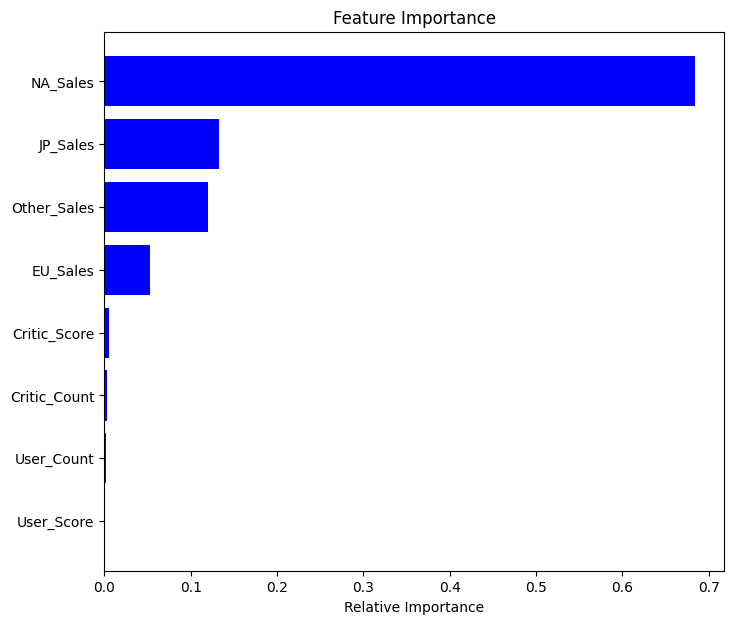

In [ ]:
# to visaulize
import_feature = rf.feature_importances_
indices=np.argsort(import_feature)# sorting the important features
plt.figure(figsize=(8,7))
plt.title("Feature Importance")
plt.barh(range(len(indices)),import_feature[indices], color ="blue", align="center")                        # barh = horizontal bar plot, thick = (range(len(indices)), center alignment = align=""

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# testing the performance of the model using K-fold cross validation
- For K values from  5,10,15

In [ ]:
## remove this code
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score,KFold, cross_val_predict
import numpy as np
import pandas as pd


# Initialize a random forest regressor
rf = RandomForestRegressor()

# Set k values
k_values = [5,10,15]

# Initialize a DataFrame to store the evaluation metrics
df_eval = pd.DataFrame(columns=['k', 'MSE', 'RMSE', 'MAE', 'R-squared', 'Adj. R-squared', 'MAPE'])

# Loop over k values
for k in k_values:
    # Set up cross-validation
    cv = KFold(n_splits=k, shuffle=True, random_state=42)

    # Perform cross-validation on the training set using evaluation metrics
    scores_r2 = cross_val_score(rf, X, y, cv=cv, scoring='r2')
    scores_rmse = cross_val_score(rf, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    scores_mae = cross_val_score(rf, X, y, cv=cv, scoring='neg_mean_absolute_error')
    scores_mse = cross_val_score(rf, X, y, cv=cv, scoring='neg_mean_squared_error')

    # Calculate adjusted R-squared
    adj_r2 = 1 - (1-scores_r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

    # Calculate mean absolute percentage error (MAPE)
    y_pred = cross_val_predict(rf, X, y, cv=cv)
    mape = np.mean(np.abs((y - y_pred) / y)) * 100

   # Add evaluation metrics to the DataFrame
    df_eval = pd.concat([df_eval, pd.DataFrame({'k': [k],
                                                'MSE': [-np.mean(scores_mse)],
                                                'RMSE': [-np.mean(scores_rmse)],
                                                'MAE': [-np.mean(scores_mae)],
                                                'R-squared': [np.mean(scores_r2)],
                                                'Adj. R-squared': [np.mean(adj_r2)],
                                                'MAPE': [mape]})], ignore_index=True)

# Print the evaluation metrics DataFrame
print(df_eval)

    k       MSE      RMSE       MAE  R-squared  Adj. R-squared          MAPE
0   5  0.084450  0.289704  0.145231   0.960650        0.960631  4.243450e+08
1  10  0.083476  0.288693  0.144554   0.961040        0.961022  3.400066e+08
2  15  0.083174  0.287300  0.143904   0.961166        0.961147  3.423834e+08


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score,KFold, cross_val_predict
import numpy as np
import pandas as pd

# Initialize a random forest regressor
rf = RandomForestRegressor()

# Set k values
k_values = [5,10,15]

# Initialize a DataFrame to store the evaluation metrics
df_eval = pd.DataFrame(columns=['k', 'MSE', 'RMSE', 'MAE', 'R-squared', 'Adj. R-squared', 'MAPE'])

# Loop over k values
for k in k_values:
    # Set up cross-validation
    cv = KFold(n_splits=k, shuffle=True, random_state=42)

    # Perform cross-validation on the training set using evaluation metrics
    y_preds = cross_val_predict(rf, X, y, cv=cv)
    scores_r2 = r2_score(y, y_preds)
    scores_rmse = mean_squared_error(y, y_preds, squared=False)
    scores_mae = mean_absolute_error(y, y_preds)
    scores_mse = mean_squared_error(y, y_preds)

    # Calculate adjusted R-squared
    adj_r2 = 1 - (1-scores_r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

    # Calculate mean absolute percentage error (MAPE)
    mape = np.mean(np.abs((y - y_preds) / y)) * 100

    # Add evaluation metrics to the DataFrame
    df_eval = pd.concat([df_eval, pd.DataFrame({'k': [k],
                                                'MSE': [scores_mse],
                                                'RMSE': [scores_rmse],
                                                'MAE': [scores_mae],
                                                'R-squared': [scores_r2],
                                                'Adj. R-squared': [adj_r2],
                                                'MAPE': [mape]})], ignore_index=True)

# Print the evaluation metrics DataFrame
print(df_eval)


    k       MSE      RMSE       MAE  R-squared  Adj. R-squared          MAPE
0   5  0.084447  0.290598  0.145297   0.960612        0.960593  4.111756e+08
1  10  0.083420  0.288824  0.144741   0.961091        0.961073  3.303636e+08
2  15  0.083043  0.288171  0.144080   0.961267        0.961249  3.433650e+08


model performance is improve by using k fold cross validation and  improve with increase in the value of k

### b. What effect will the number of critics and users as well as their review scores have on the sales of Video games in North America, EU and Japan?

####   Effect of "Critic_Score", "Critic_Count","User_Score", "User_Count" on the sales of Video games in North America

### North America


In [ ]:
# Select features and target
x_NA = df[[ "Critic_Score", "Critic_Count","User_Score", "User_Count"]]
y_NA = df["NA_Sales"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_NA,y_NA,test_size = 0.2,random_state=42)

In [ ]:
x_train_NA = scaler.fit_transform(x_train) # fit calculate the mean & SDT of each of the variable. transform use cal mean and STD to transform our data
x_test_NA = scaler.transform(x_test)

In [ ]:
# Create a linear regression object
reg = LinearRegression()

# Fit the model using the training data
reg.fit(x_train_NA, y_train)

LinearRegression()

In [ ]:

# Get the coefficients
coefficients = reg.coef_

#intercept = mlr_bmi.intercept_
intercept = reg.intercept_
NA_model = 'NA_sales = {:.3f} + {:.3f}*Critic_score + {:.3f}*Critic_Count + {:.3f}*User_Score + {:.3f}*User_count'.format(intercept,coefficients[0],coefficients[1],coefficients[2],coefficients[3])
print('Relationship to sales in North America:', NA_model)

Relationship to sales in North America: NA_sales = 0.161 + 0.003*Critic_score + 0.039*Critic_Count + 0.000*User_Score + 0.040*User_count


In [ ]:
# test the model
NA_pred = reg.predict(x_test_NA)

In [ ]:
# evaluate the performance of the model
mean_abs = mean_absolute_error(y_test,NA_pred)
mean_squared = mean_squared_error(y_test,NA_pred)

print(f"The mean_absolute_error is: {mean_abs:.3f}")
print(f"The result of the mean squared error is : {mean_squared:.3f}")
print(f"The root mean squared error is : {np.sqrt(mean_squared):.3f}")
# The coefficient of determination: 1 is perfect prediction
print(f"The coefficient of determination is: {r2_score(y_test,NA_pred):.3f}")

The mean_absolute_error is: 0.139
The result of the mean squared error is : 0.032
The root mean squared error is : 0.180
The coefficient of determination is: 0.169


### Effect "Critic_Score", "Critic_Count","User_Score", "User_Count" on the sales of Video games in EU

In [ ]:
# Select features and target
x_EU = df[["Critic_Score", "Critic_Count","User_Score", "User_Count"]]
y_EU = df["EU_Sales"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_EU,y_EU,test_size = 0.2,random_state=42)

In [ ]:
x_train_EU = scaler.fit_transform(x_train)
x_test_EU = scaler.transform(x_test)

In [ ]:

# Create a linear regression object
reg_EU = LinearRegression()

# Fit the model using the training data
reg_EU.fit(x_train_EU, y_train)

# Get the coefficients
coefficients = reg_EU.coef_

#intercept = mlr_bmi.intercept_
intercept = reg_EU.intercept_
EU_model = 'EU_sales = {:.3f} + {:.3f}*Critic_score + {:.3f}*Critic_Count + {:.3f}*User_Score + {:.3f}*User_count'.format(intercept,coefficients[0],coefficients[1],coefficients[2],coefficients[3])
print('Relationship to sales in Europe:', EU_model)

Relationship to sales in Europe: EU_sales = 0.071 + -0.004*Critic_score + 0.016*Critic_Count + 0.000*User_Score + 0.031*User_count


### Effect "Critic_Score", "Critic_Count","User_Score", "User_Count" on the sales of Video games in JP

In [ ]:
# Select features and target
x_JP = df[["Critic_Score", "Critic_Count","User_Score", "User_Count"]]
y_JP = df["JP_Sales"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_JP,y_JP,test_size = 0.2,random_state=42)

In [ ]:
x_train_JP = scaler.fit_transform(x_train)
x_test_JP = scaler.transform(x_test)

In [ ]:

# Create a linear regression object
reg_JP = LinearRegression()

# Fit the model using the training data
reg_JP.fit(x_train_JP, y_train)

# Get the coefficients
coefficients = reg_JP.coef_

#intercept = mlr_bmi.intercept_
intercept = reg_JP.intercept_
JP_model = 'JP_sales = {:.3f} + {:.3f}*Critic_score + {:.3f}*Critic_Count + {:.3f}*User_Score + {:.3f}*User_count'.format(intercept,coefficients[0],coefficients[1],coefficients[2],coefficients[3])
print('Relationship to sales in Japan:', JP_model)

Relationship to sales in Japan: JP_sales = 0.024 + -0.015*Critic_score + 0.005*Critic_Count + 0.000*User_Score + 0.007*User_count


#### 1(d) Use all the relevant categorical variables in the Video Game Dataset as the targetvariable at each instance and determine which of the variables performed best in classifying the dataset. Explain your findings.

- A Classification problem  

In [ ]:
df["Rating"].value_counts()

Unknown    6767
E          3991
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: Rating, dtype: int64

In [ ]:
# subsetting the rating column
N_df=df[df["Rating"].isin(["E","T","M","E10+"])]

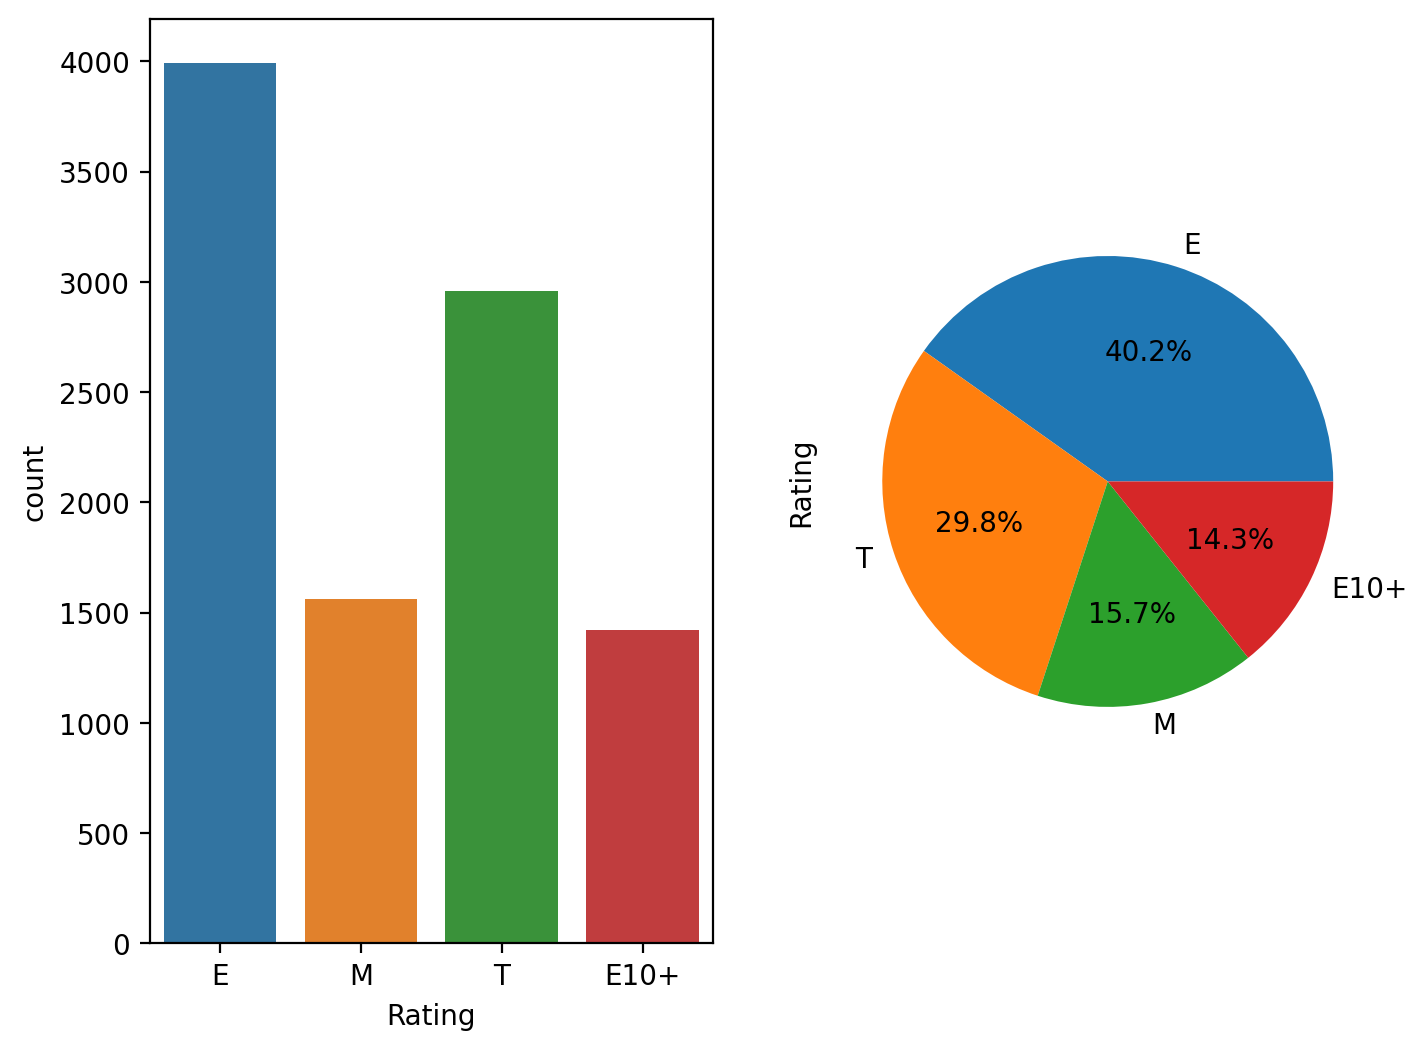

In [ ]:
# viewing the rating in our data set
fig, ax_position=plt.subplots(1,2,figsize=(8,6),dpi=200) # creates the framework for th
a = sns.countplot(x = 'Rating', data = N_df, ax=ax_position[0]) #ax_position[0] spe
a = N_df['Rating'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1])

In [ ]:
X = N_df[["Genre", "NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales", "Critic_Score", "Critic_Count",
        "User_Score", "User_Count", "New_platform", "Global_Sales"]]
y = N_df['Rating']

In [ ]:
# onehot encoding  on selected features
x_new = pd.get_dummies(X, drop_first=True)

In [ ]:
# encoding the target

#from sklearn.preprocessing import LabelEncoder

#label_e = LabelEncoder()
#y = label_e.fit_transform(y)

In [ ]:
# import SMOTE to scale our data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors = 2)

In [ ]:
# apply SMOTE to resample the dataset
X_res, y_res = sm.fit_resample(x_new, y) # The object is applied
X, y = X_res, y_res # reassigning the balanced dataset to X,y

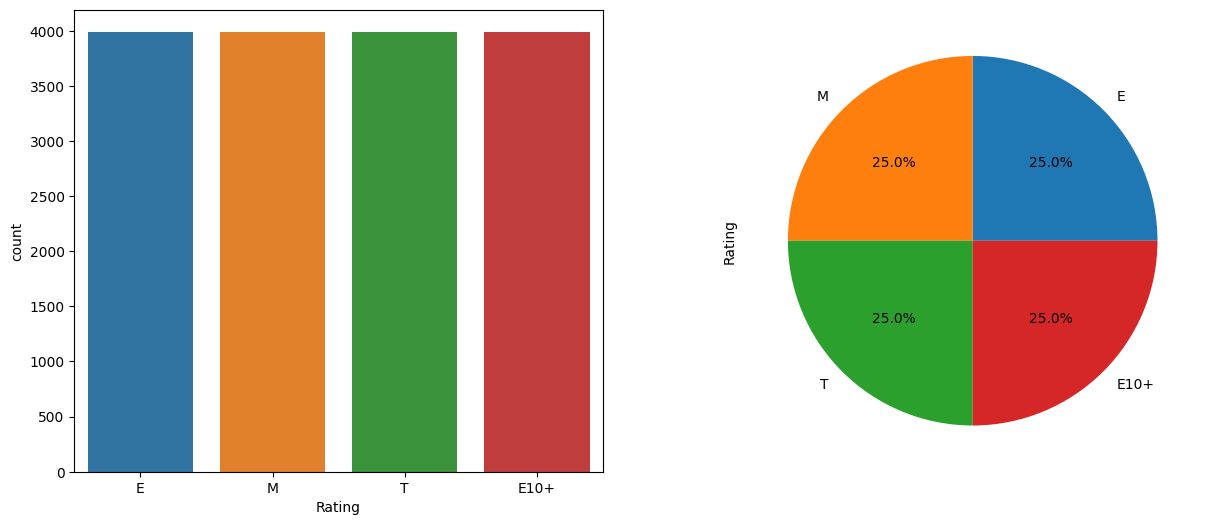

In [ ]:
# Plot of the dataset after applying smoot to know if the changes has been made
N_df = pd.concat([X,y], axis = 1)
fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot
a = sns.countplot(x='Rating',data=N_df, ax=ax[0]) # assigning each of the plot to th
a= N_df['Rating'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) # assigning

In [ ]:
# encoding the target

from sklearn.preprocessing import LabelEncoder

label_e = LabelEncoder()
y = label_e.fit_transform(y)

In [ ]:
# checking the changes
from typing import Counter
Counter(y)

Counter({0: 3991, 2: 3991, 3: 3991, 1: 3991})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# scaling our data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scikitplot.metrics import plot_roc_curve

In [ ]:
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score,precision_score, recall_score, f1_score)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize a decision tree classifier
rf_clf = RandomForestClassifier(random_state=0,)

# Fit the model on the training set
rf_clf.fit(X_train_scaled,y_train)



RandomForestClassifier(random_state=0)

In [ ]:
# Initialize a decision tree classifier
rf_clf = RandomForestClassifier(random_state=0,)

# Fit the model on the training set
rf_clf.fit(X_train_scaled,y_train)

# Make predictions on the testing set
y_pred = rf_clf.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = "weighted")
recall = recall_score(y_test, y_pred, average = "weighted")
f1 = f1_score(y_test, y_pred, average = "weighted")

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
df_eval = pd.DataFrame({'Accuracy': [accuracy],
                        'Precision': [precision],
                        'Recall': [recall],
                        'F1-score': [f1]})

print("Evaluation Metrics:")
print(df_eval)
print()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for the Testing Set:")
print(cm)

Evaluation Metrics:
   Accuracy  Precision    Recall  F1-score
0  0.740683   0.736322  0.740683  0.736341

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       796
           1       0.74      0.79      0.77       790
           2       0.78      0.84      0.81       791
           3       0.67      0.55      0.60       816

    accuracy                           0.74      3193
   macro avg       0.74      0.74      0.74      3193
weighted avg       0.74      0.74      0.74      3193

Confusion Matrix for the Testing Set:
[[629  76  14  77]
 [ 72 627  29  62]
 [ 11  34 664  82]
 [119 107 145 445]]


### to check if the model did not overfit

In [ ]:
# Make predictions on the training set
y_train_pred = rf_clf.predict(X_train_scaled)

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average="weighted")
train_recall = recall_score(y_train, y_train_pred, average="weighted")
train_f1 = f1_score(y_train, y_train_pred, average="weighted")

# Create a confusion matrix
train_cm = confusion_matrix(y_train, y_train_pred)

# Print the evaluation metrics and confusion matrix for the training set
df_train_eval = pd.DataFrame({'Accuracy': [train_accuracy],
                        'Precision': [train_precision],
                        'Recall': [train_recall],
                        'F1-score': [train_f1]})
print("Evaluation Metrics on the Training Set:")
print(df_train_eval)

print("Confusion Matrix for the Training Set:")
print(train_cm)


Evaluation Metrics on the Training Set:
   Accuracy  Precision   Recall  F1-score
0   0.99585   0.995858  0.99585  0.995852
Confusion Matrix for the Training Set:
[[3180   12    0    3]
 [  18 3180    0    3]
 [   0    0 3200    0]
 [  13    4    0 3158]]


###  training and testin together

In [ ]:
# Make predictions on the training set
y_train_pred = rf_clf.predict(X_train_scaled)

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average="weighted")
train_recall = recall_score(y_train, y_train_pred, average="weighted")
train_f1 = f1_score(y_train, y_train_pred, average="weighted")

# Create a confusion matrix
train_cm = confusion_matrix(y_train, y_train_pred)

# Print the evaluation metrics and confusion matrix for the training set
df_train_eval = pd.DataFrame({'Accuracy': [train_accuracy],
                        'Precision': [train_precision],
                        'Recall': [train_recall],
                        'F1-score': [train_f1]})
print("Evaluation Metrics on Rating Training Set:")
print(df_train_eval)

print("Confusion Matrix for Rating Training Set:")
print(train_cm)


# Make predictions on the testing set
y_pred = rf_clf.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = "weighted")
recall = recall_score(y_test, y_pred, average = "weighted")
f1 = f1_score(y_test, y_pred, average = "weighted")

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix for the testing set
df_eval_r = pd.DataFrame({'Accuracy': [accuracy],
                        'Precision': [precision],
                        'Recall': [recall],
                        'F1-score': [f1]})
print("\nEvaluation Metrics on Rating Testing Set:")
print(df_eval_r)

print("Confusion Matrix for Rating Testing Set:")
print(cm)


Evaluation Metrics on Rating Training Set:
   Accuracy  Precision   Recall  F1-score
0   0.99585   0.995858  0.99585  0.995852
Confusion Matrix for Rating Training Set:
[[3180   12    0    3]
 [  18 3180    0    3]
 [   0    0 3200    0]
 [  13    4    0 3158]]

Evaluation Metrics on Rating Testing Set:
   Accuracy  Precision    Recall  F1-score
0  0.740683   0.736322  0.740683  0.736341
Confusion Matrix for Rating Testing Set:
[[629  76  14  77]
 [ 72 627  29  62]
 [ 11  34 664  82]
 [119 107 145 445]]


### checking for overfitting

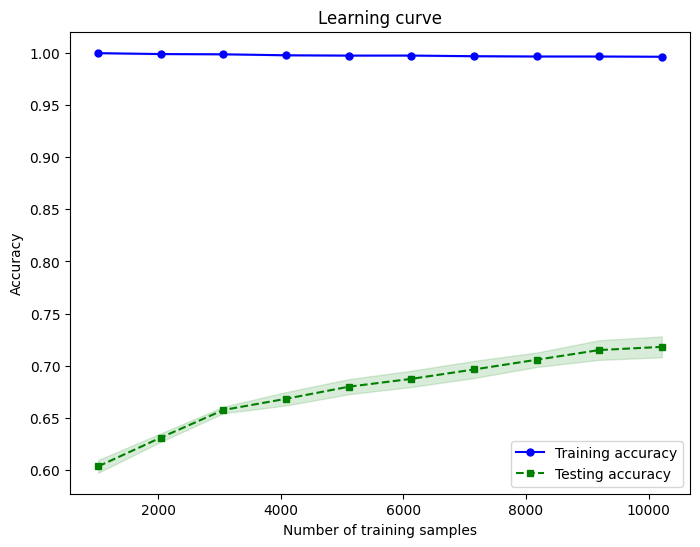

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_clf, X_train_scaled, y_train, cv=5, n_jobs=-1,
    scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Testing accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid(False)
plt.title('Learning curve')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


The model is exhibiting underfitting because its performance metrics (accuracy, recall, F1 score, and precision) are low on both the training and testing validation set. This implies that the model is struggling to understand the pattern in the training data and is also struggling to make meaningful predictions on the validation set.

It is not advisable to deploy the classification model in practice based on its current performance because the model is not reliable. An underfitting model cannot be deployed in production since it will not perform well and may give incorrect predictions.

###  checking the performance of different regressors

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


# Initialize a dictionary to store the models and their evaluation metrics
models = {'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(random_state=0),
          'KNeighbor':KNeighborsClassifier(),
          'Support vector':SVC(random_state=42),
          'Logistic Regression': LogisticRegression(max_iter=1000)}

# Initialize a DataFrame to store the evaluation metrics
df_eval = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

# Loop over the models
for name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train_scaled, y_train)

    # Predict the target values on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate the evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred,  average = "weighted")
    rec = recall_score(y_test, y_pred, average = "weighted")
    f1 = f1_score(y_test, y_pred, average = "weighted")


   # Add evaluation metrics to the DataFrame
    df_eval = pd.concat([df_eval, pd.DataFrame({'Model': [name],
                              'Accuracy': [acc],
                              'Precision': [prec],
                              'Recall': [rec],
                              'F1-score': [f1]})], ignore_index=True)

    # print classication report  of each model
    print(f"Classfication report for {name}:\n{classification_report(y_test, y_pred)}\n")

    # Print the confusion matrix for each model
    print(f"Confusion matrix for {name}:\n{confusion_matrix(y_test, y_pred)}\n")

# Print the evaluation metrics DataFrame
print(df_eval)


Classfication report for Decision Tree:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       796
           1       0.66      0.66      0.66       790
           2       0.73      0.73      0.73       791
           3       0.52      0.52      0.52       816

    accuracy                           0.64      3193
   macro avg       0.64      0.65      0.65      3193
weighted avg       0.64      0.64      0.64      3193


Confusion matrix for Decision Tree:
[[532 109  30 125]
 [100 523  42 125]
 [ 21  51 580 139]
 [145 108 141 422]]

Classfication report for Random Forest:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       796
           1       0.74      0.79      0.77       790
           2       0.78      0.84      0.81       791
           3       0.67      0.55      0.60       816

    accuracy                           0.74      3193
   macro avg       0.74      0.74      0.74 

###  kfold cross_validation using randow forest classifier

In [ ]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Initialize a random forest classifier
rf = RandomForestClassifier()

# Set k values
k_values = [5, 10, 15]

# Initialize a DataFrame to store the evaluation metrics
df_eval = pd.DataFrame(columns=['k', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

# Loop over k values
for k in k_values:
    # Set up cross-validation
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    # Perform cross-validation on the training set using evaluation metrics
    acc_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')
    prec_scores = cross_val_score(rf, X, y, cv=cv, scoring='precision_weighted')
    rec_scores = cross_val_score(rf, X, y, cv=cv, scoring='recall_weighted')
    f1_scores = cross_val_score(rf, X, y, cv=cv, scoring='f1_weighted')

    # Calculate the mean of the evaluation metrics
    acc_mean = np.mean(acc_scores)
    prec_mean = np.mean(prec_scores)
    rec_mean = np.mean(rec_scores)
    f1_mean = np.mean(f1_scores)

    # Add evaluation metrics to the DataFrame
    df_eval = pd.concat([df_eval, pd.DataFrame({'k': [k],
                                                'Accuracy': [acc_mean],
                                                'Precision': [prec_mean],
                                                'Recall': [rec_mean],
                                                'F1-score': [f1_mean]})], ignore_index=True)

# Print the evaluation metrics DataFrame
print(df_eval)


    k  Accuracy  Precision    Recall  F1-score
0   5  0.726885   0.723236  0.727073  0.724053
1  10  0.735655   0.731875  0.737033  0.731843
2  15  0.738475   0.737015  0.738915  0.733655


### Genre as  the target

In [ ]:
df["Genre"].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [ ]:
# Select features and target
X_g =df[["Rating", "NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales", "Critic_Score", "Critic_Count",
        "User_Score", "User_Count", "New_platform", "Global_Sales"]]

y_g = df["Genre"]

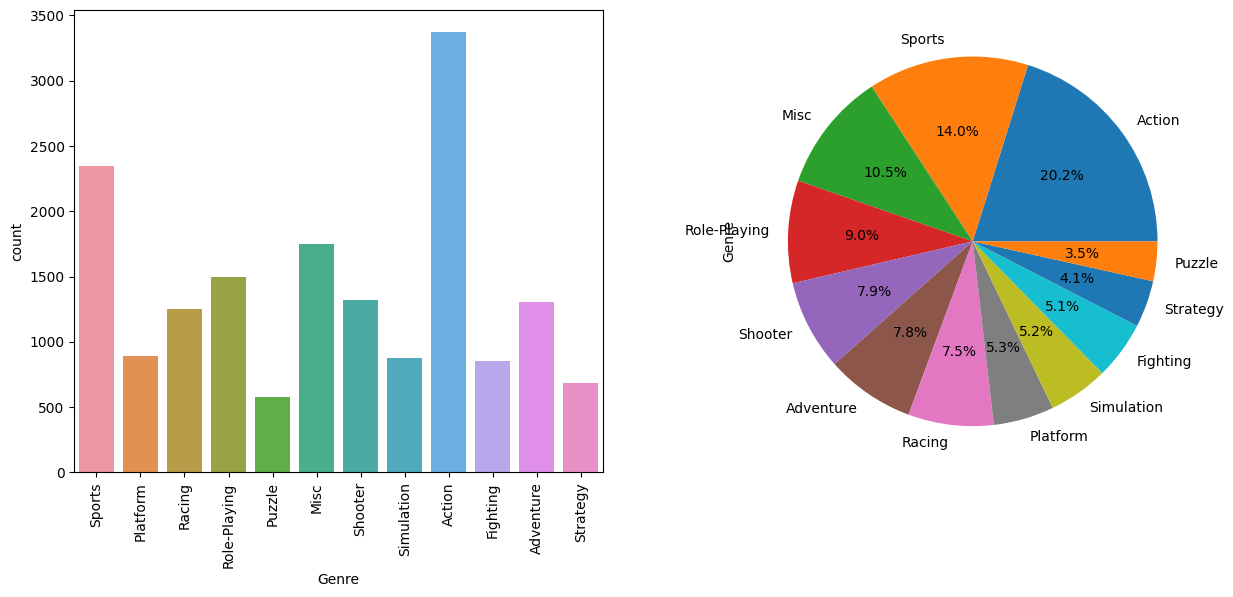

In [ ]:
# Plot of the dataset after applying smoot to know if the changes has been made

fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot
a = sns.countplot(x='Genre',data=df, ax=ax[0]) # assigning each of the plot to th
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a= df['Genre'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])


In [ ]:
# onehot encoding  on selected features
x_new_g = pd.get_dummies(X_g, drop_first=True)

#x_new_g

In [ ]:
label_e = LabelEncoder()
y_new_g = label_e.fit_transform(y_g)

In [ ]:
#from typing import Counter
Counter(y_new_g)

Counter({10: 2348,
         4: 888,
         6: 1249,
         7: 1500,
         5: 580,
         3: 1750,
         8: 1323,
         9: 874,
         0: 3370,
         2: 849,
         1: 1303,
         11: 683})

In [ ]:
# applying smooth
sm = SMOTE(random_state=42, k_neighbors = 2) #
X_res, y_res = sm.fit_resample(x_new_g, y_new_g) # The object is applied
X, y = X_res, y_res

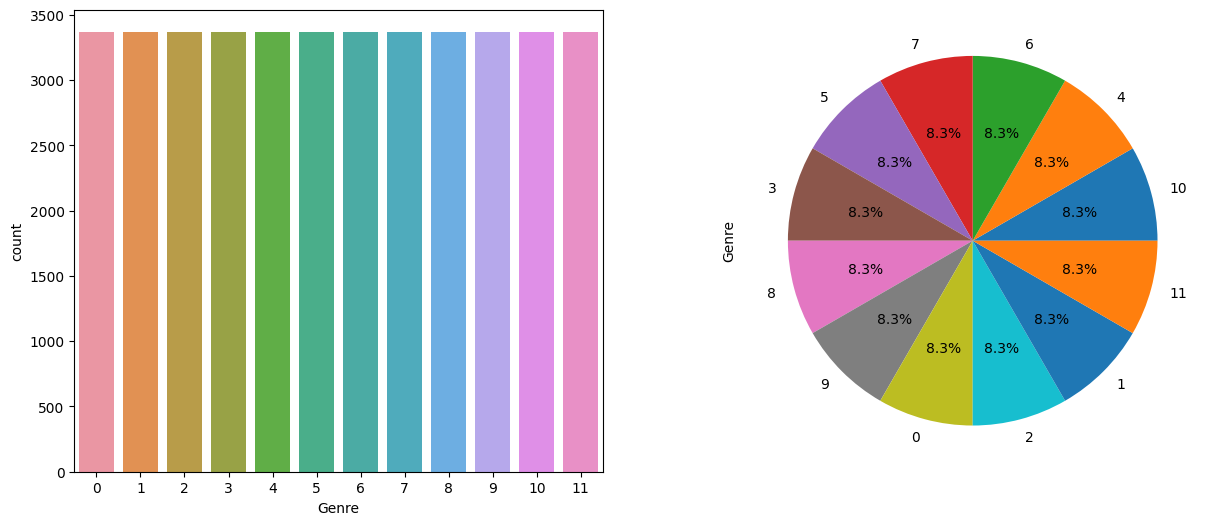

In [ ]:


# Convert X and y to DataFrames
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y, columns=['Genre'])

# Concatenate X and y DataFrames
bal_df = pd.concat([X_df, y_df], axis=1)

# Plot the dataset
fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot
a = sns.countplot(x='Genre',data=bal_df, ax=ax[0]) # assigning each of the plot to th
a= bal_df['Genre'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) # assigning


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# scaling our data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_g = scaler.fit_transform(X_train)
X_test_g = scaler.transform(X_test)

In [ ]:
# Initialize a decision tree classifier
#rf_clf_g = RandomForestClassifier(random_state=0,)

# Fit the model on the training set
#rf_clf_g.fit(X_train_g,y_train)

In [ ]:
# Initialize a decision tree classifier
rf_clf_g = RandomForestClassifier(random_state=0,)

# Fit the model on the training set
rf_clf_g.fit(X_train_g,y_train)

# Make predictions on the training set
y_train_pred_g = rf_clf_g.predict(X_train_g)

# Calculate evaluation metrics
train_accuracy_g = accuracy_score(y_train, y_train_pred_g)
train_precision_g = precision_score(y_train, y_train_pred_g, average="weighted")
train_recall_g = recall_score(y_train, y_train_pred_g, average="weighted")
train_f1_g = f1_score(y_train, y_train_pred_g, average="weighted")

# Create a confusion matrix
train_cm_g = confusion_matrix(y_train, y_train_pred_g)

# Print the evaluation metrics and confusion matrix for the training set
df_train_eval_g = pd.DataFrame({'Accuracy': [train_accuracy_g],
                        'Precision': [train_precision_g],
                        'Recall': [train_recall_g],
                        'F1-score': [train_f1_g]})
print("Evaluation Metrics on Genre Training Set:")
print(f"{df_train_eval_g}\n")

# Classification report for training set
print("\nClassification Report for Genre Training Set:")
print(f"{classification_report(y_train, y_train_pred_g)}\n")

print("Confusion Matrix for Genre Training Set:")
print(train_cm_g)
print()

# Make predictions on the testing set
y_pred_g = rf_clf_g.predict(X_test_g)

# Calculate evaluation metrics
accuracy_g = accuracy_score(y_test, y_pred_g)
precision_g = precision_score(y_test, y_pred_g, average = "weighted")
recall_g = recall_score(y_test, y_pred_g, average = "weighted")
f1_g = f1_score(y_test, y_pred_g, average = "weighted")

# Create a confusion matrix
cm_g = confusion_matrix(y_test, y_pred_g)

# Print the evaluation metrics and confusion matrix for the testing set
df_eval_g = pd.DataFrame({'Accuracy': [accuracy_g],
                        'Precision': [precision_g],
                        'Recall': [recall_g],
                        'F1-score': [f1_g]})
print("\nEvaluation Metrics on Genre Testing Set:")
print(f"{df_eval_g}\n")

# Classification report for testing set
print("\nClassification Report for Genre Testing Set:")
print(f"{classification_report(y_test, y_pred_g)}\n")

print("Confusion Matrix for Genre Testing Set:")
print(cm_g)

Evaluation Metrics on Genre Training Set:
   Accuracy  Precision    Recall  F1-score
0  0.878369   0.885849  0.878369  0.879791


Classification Report for Genre Training Set:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      2705
           1       0.65      0.87      0.75      2680
           2       0.89      0.88      0.88      2711
           3       0.83      0.79      0.81      2681
           4       0.92      0.96      0.94      2723
           5       0.91      0.93      0.92      2716
           6       0.94      0.92      0.93      2703
           7       0.88      0.81      0.84      2664
           8       0.95      0.94      0.95      2696
           9       0.92      0.89      0.90      2705
          10       0.92      0.84      0.88      2674
          11       0.86      0.90      0.88      2694

    accuracy                           0.88     32352
   macro avg       0.89      0.88      0.88     32352
weighted avg

 ### New plat form as  the target

In [ ]:
df["New_platform"].value_counts

<bound method IndexOpsMixin.value_counts of 0           Wii
1        Others
2           Wii
3           Wii
4        Others
          ...  
16712       PS3
16713      X360
16714        PS
16715    Others
16716        PS
Name: New_platform, Length: 16717, dtype: object>

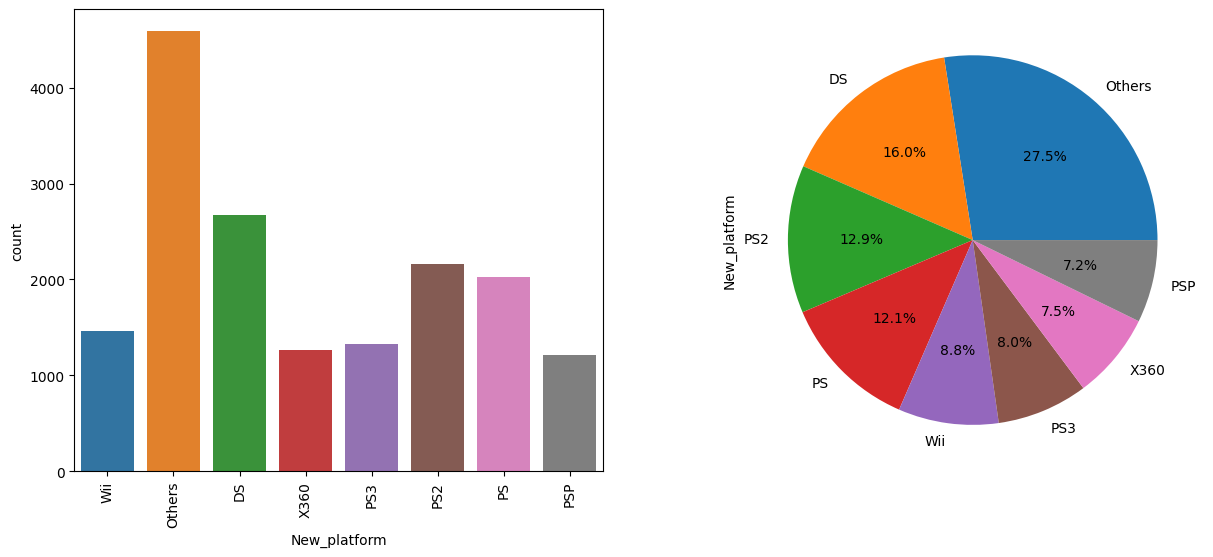

In [ ]:
# Plot of the dataset after applying smoot to know if the changes has been made

fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot
a = sns.countplot(x='New_platform',data=df, ax=ax[0]) # assigning each of the plot to th
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a= df['New_platform'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

In [ ]:
# Select features and target
X_n =df[["Rating", "NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales", "Critic_Score", "Critic_Count",
        "User_Score", "User_Count", "Genre", "Global_Sales"]]

y_n = df["New_platform"]

In [ ]:
# onehot encoding  on selected features
x_new_n = pd.get_dummies(X_n, drop_first=True)

#x_new_g

In [ ]:
label_e = LabelEncoder()
y_new_n = label_e.fit_transform(y_n)

In [ ]:
# applying smooth
sm = SMOTE(random_state=42, k_neighbors = 2) #
X_res, y_res = sm.fit_resample(x_new_n, y_new_n) # The object is applied
X, y = X_res, y_res

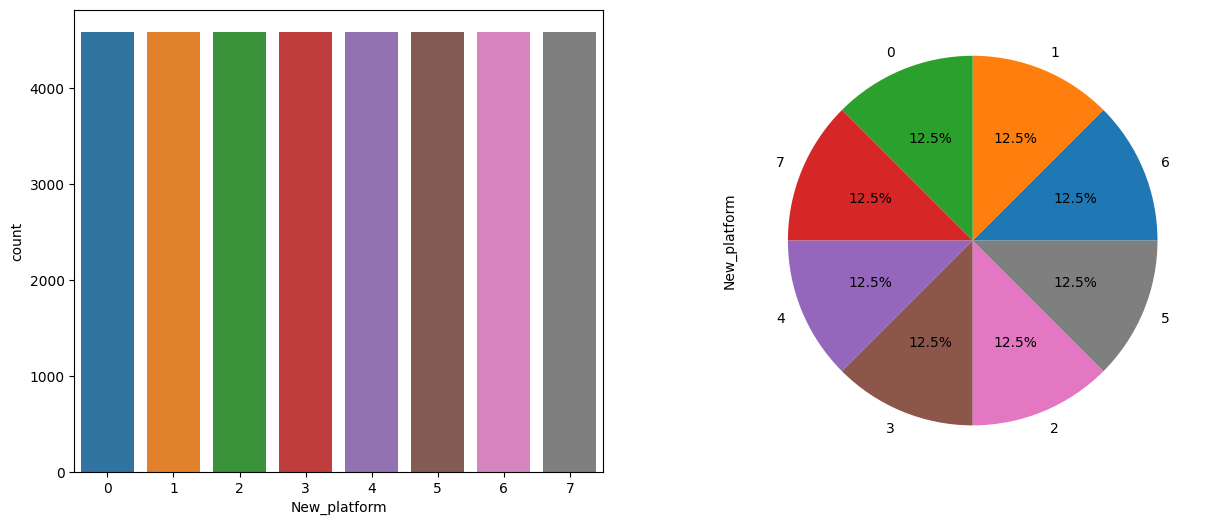

In [ ]:

# Convert X and y to DataFrames
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y, columns=['New_platform'])

# Concatenate X and y DataFrames
bal_df = pd.concat([X_df, y_df], axis=1)

# Plot the dataset
fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot
a = sns.countplot(x='New_platform',data=bal_df, ax=ax[0]) # assigning each of the plot to th
a= bal_df['New_platform'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) # assigning


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# scaling our data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

### Training and evaluating the model

In [ ]:
# Initialize a decision tree classifier
rf_clf_n = RandomForestClassifier(random_state=0,)

# Fit the model on the training set
rf_clf_n.fit(X_train_n,y_train)

# Make predictions on the training set
y_train_pred_n = rf_clf_n.predict(X_train_n)

# Calculate evaluation metrics
train_accuracy_n = accuracy_score(y_train, y_train_pred_n)
train_precision_n = precision_score(y_train, y_train_pred_n, average="weighted")
train_recall_n = recall_score(y_train, y_train_pred_n, average="weighted")
train_f1_n = f1_score(y_train, y_train_pred_n, average="weighted")

# Create a confusion matrix
train_cm_n = confusion_matrix(y_train, y_train_pred_n)

# Print the evaluation metrics and confusion matrix for the training set
df_train_eval_n = pd.DataFrame({'Accuracy': [train_accuracy_n],
                        'Precision': [train_precision_n],
                        'Recall': [train_recall_n],
                        'F1-score': [train_f1_n]})
print("Evaluation Metrics on Platform Training Set:")
print(f"{df_train_eval_n}\n")

# Classification report for training set
print("\nClassification Report for Platform Training Set:")
print(f"{classification_report(y_train, y_train_pred_n)}\n")

print("Confusion Matrix for Platform Training Set:")
print(train_cm_n)
print()

# Make predictions on the testing set
y_pred_n = rf_clf_n.predict(X_test_n)

# Calculate evaluation metrics
accuracy_n = accuracy_score(y_test, y_pred_n)
precision_n = precision_score(y_test, y_pred_n, average = "weighted")
recall_n = recall_score(y_test, y_pred_n, average = "weighted")
f1_n = f1_score(y_test, y_pred_n, average = "weighted")

# Create a confusion matrix
cm_n = confusion_matrix(y_test, y_pred_n)

# Print the evaluation metrics and confusion matrix for the testing set
df_eval_n = pd.DataFrame({'Accuracy': [accuracy_n],
                        'Precision': [precision_n],
                        'Recall': [recall_n],
                        'F1-score': [f1_n]})
print("\nEvaluation Metrics on Platform Testing Set:")
print(f"{df_eval_n}\n")

# Classification report for testing set
print("\nClassification Report for Platform Testing Set:")
print(f"{classification_report(y_test, y_pred_n)}\n")

print("Confusion Matrix for Platform Testing Set:")
print(cm_n)

Evaluation Metrics on Platform Training Set:
   Accuracy  Precision    Recall  F1-score
0  0.906243   0.917849  0.906243  0.908992


Classification Report for Platform Training Set:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      3677
           1       0.96      0.93      0.95      3658
           2       0.96      0.87      0.91      3667
           3       0.95      0.87      0.91      3706
           4       0.98      0.90      0.94      3692
           5       0.70      0.94      0.80      3679
           6       0.96      0.95      0.96      3687
           7       0.99      0.97      0.98      3629

    accuracy                           0.91     29395
   macro avg       0.92      0.91      0.91     29395
weighted avg       0.92      0.91      0.91     29395


Confusion Matrix for Platform Training Set:
[[3059   38   34   50   21  393   78    4]
 [  86 3390   18   38   10   88   18   10]
 [  88   13 3183   13   18  348    4

- the model overfitted becuase it pertormed better on the testing than on the training data

In [ ]:
print("\nModel performance using  Platform as target:")
print(f"{df_eval_n}\n")

print("\nModel performance using  Genre as target:")
print(f"{df_eval_g}\n")

print("\nModel performance using  Rating as target:")
print(df_eval_r)



Model performance using  Platform as target:
   Accuracy  Precision    Recall  F1-score
0  0.708532   0.713388  0.708532  0.708671


Model performance using  Genre as target:
   Accuracy  Precision    Recall  F1-score
0  0.549827   0.546553  0.549827  0.546669


Model performance using  Rating as target:
   Accuracy  Precision    Recall  F1-score
0  0.740683   0.736322  0.740683  0.736341


### visualizing  performance of rating, genre and platform in classifying our data

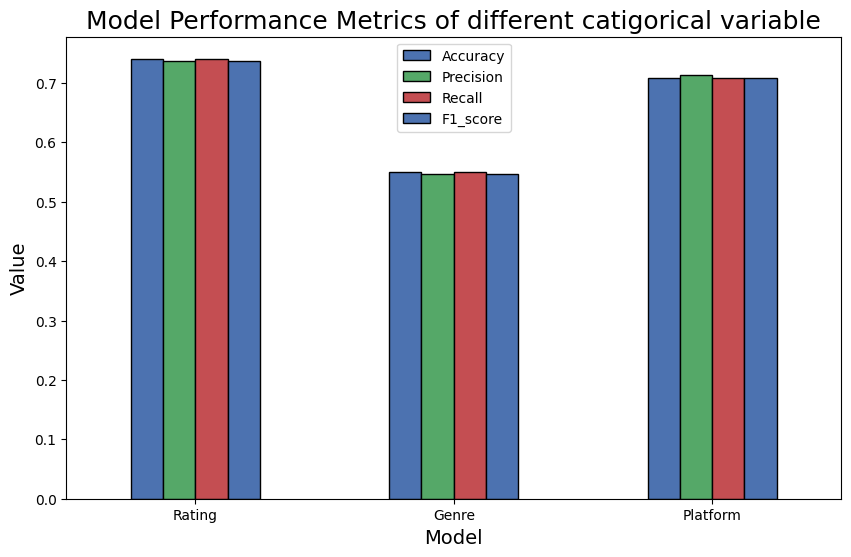

In [ ]:
# visualizing the different regressors

# Create a dataframe with the model performance metrics
data = {'Model': ['Rating','Genre', 'Platform'],
        'Accuracy': [0.740683,0.549827,0.708532],
        'Precision': [0.736322, 0.546553,0.713388],
        'Recall': [0.740683,0.549827,0.708532],
        'F1_score': [0.736341,0.546669,0.708671]}
df_m = pd.DataFrame(data)

# Set the Model column as the index
df_m.set_index('Model', inplace=True)

# Set the color palette
colors = ['#4c72b0', '#55a868', '#c44e52']

# Plot the bar chart with the new color palette
ax = df_m.plot(kind='bar', figsize=(10, 6), color=colors, edgecolor='black')

# Set the plot title and labels
ax.set_title('Model Performance Metrics of different catigorical variable', fontsize=18)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Value', fontsize=14)
ax.set_xticklabels(df_m.index, rotation=0)

# Show the plot
plt.show()


### visualizing the performance of different regressors

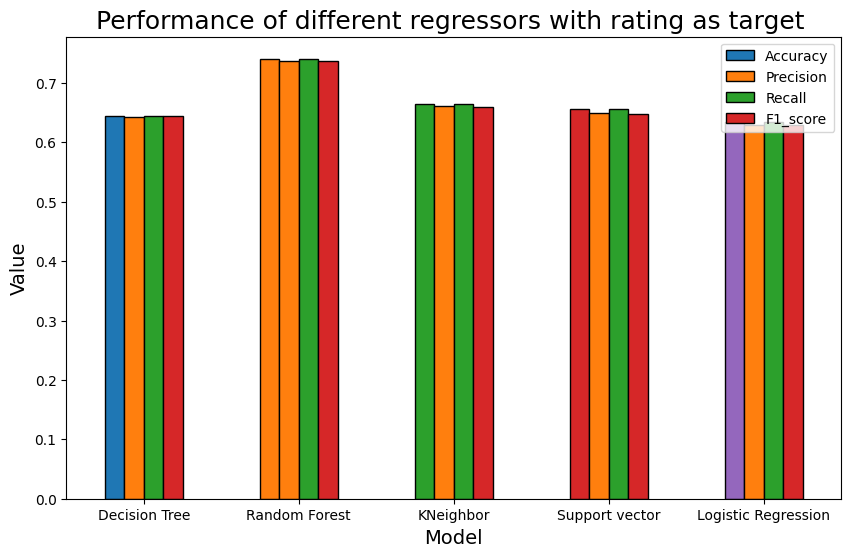

In [ ]:
# Create a dataframe with the model performance metrics
data = {'Model': ['Decision Tree', 'Random Forest', 'KNeighbor', 'Support vector', 'Logistic Regression'],
        'Accuracy': [0.644535, 0.740683, 0.665205, 0.655496, 0.634826],
        'Precision': [0.642656, 0.736322, 0.660526, 0.649937, 0.628396],
        'Recall': [0.644535, 0.740683, 0.665205, 0.655496, 0.634826],
        'F1_score': [0.643508, 0.736341, 0.658781, 0.647406, 0.629172]}
df_m = pd.DataFrame(data)

# Set the Model column as the index
df_m.set_index('Model', inplace=True)

# Plot the bar chart
ax = df_m.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], edgecolor='black')

# Set the plot title and labels
ax.set_title('Performance of different regressors with rating as target ', fontsize=18)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Value', fontsize=14)
ax.set_xticklabels(df_m.index, rotation=0)

# Change the color of the bars
ax.patches[0].set_facecolor('#1f77b4')
ax.patches[1].set_facecolor('#ff7f0e')
ax.patches[2].set_facecolor('#2ca02c')
ax.patches[3].set_facecolor('#d62728')
ax.patches[4].set_facecolor('#9467bd')

# Show the plot
plt.show()
